# Problem 1

## Part1. Import dataset

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import os
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt




In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

100%|██████████| 25.7M/25.7M [00:00<00:00, 62.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1"

print(os.listdir(dataset_path))

['IMDB Dataset.csv']


In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/IMDB Dataset.csv"

df = pd.read_csv(dataset_path)
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
texts = df['review'].values
labels = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

In [ ]:
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(texts)
X = X.toarray()
X

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [ ]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (40000, 1000)
Test data shape: (10000, 1000)


In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

## Part 2. RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [ ]:
def build_rnn_model(input_dim, output_dim=256):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=output_dim, input_length=1000),
        SimpleRNN(units=output_dim),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

rnn_model = build_rnn_model(input_dim=1000)

In [ ]:
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 218ms/step - accuracy: 0.5259 - loss: 0.6981 - val_accuracy: 0.5073 - val_loss: 0.6942
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 206ms/step - accuracy: 0.5054 - loss: 0.6981 - val_accuracy: 0.5047 - val_loss: 0.6931
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.5132 - loss: 0.6918 - val_accuracy: 0.5100 - val_loss: 0.6913
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 209ms/step - accuracy: 0.5064 - loss: 0.6926 - val_accuracy: 0.5010 - val_loss: 0.6941
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 205ms/step - accuracy: 0.5114 - loss: 0.6924 - val_accuracy: 0.5177 - val_loss: 0.6933
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 208ms/step - accuracy: 0.5149 - loss: 0.6914 - val_accuracy: 0.5175 - val_loss: 0.6906
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 205ms/step - accuracy: 0.5114 - loss: 0.6908 - val_accuracy: 0.5195 - val_loss: 0.6897
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.5128 - loss: 0

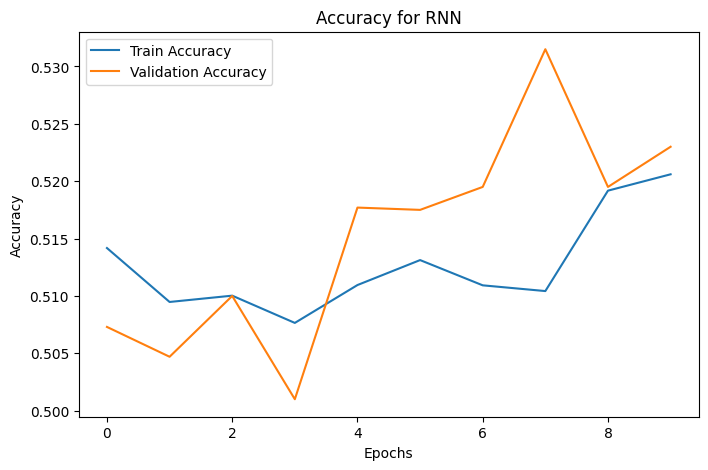

In [ ]:
def plot_model_accuracy(history, model_name):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy for {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_model_accuracy(rnn_history, 'RNN')

## Part 3. LSTM

In [ ]:
from tensorflow.keras.layers import LSTM

def build_lstm_model(input_dim, output_dim=256):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=output_dim, input_length=1000),
        LSTM(units=output_dim),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm_model(input_dim=1000)


In [ ]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 314ms/step - accuracy: 0.5126 - loss: 0.6931 - val_accuracy: 0.5661 - val_loss: 0.6777
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 324ms/step - accuracy: 0.5765 - loss: 0.6749 - val_accuracy: 0.5763 - val_loss: 0.6754
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 325ms/step - accuracy: 0.5754 - loss: 0.6723 - val_accuracy: 0.5873 - val_loss: 0.6713
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 332ms/step - accuracy: 0.5832 - loss: 0.6698 - val_accuracy: 0.5841 - val_loss: 0.6691
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 327ms/step - accuracy: 0.5883 - loss: 0.6656 - val_accuracy: 0.5759 - val_loss: 0.6726
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 338ms/step - accuracy: 0.5898 - loss: 0.6673 - val_accuracy: 0.5854 - val_loss: 0.6641
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 329ms/step - accuracy: 0.5944 - loss: 0.6628 - val_accuracy: 0.5870 - val_loss: 0.6672
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 330ms/step - accuracy: 0.5988 - loss: 0

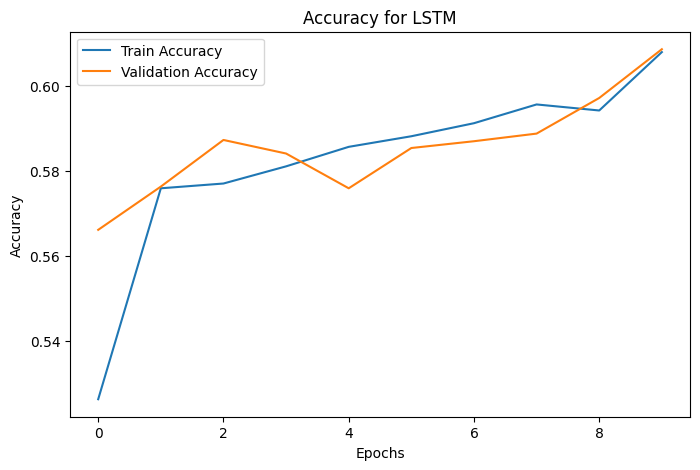

In [ ]:
plot_model_accuracy(lstm_history, 'LSTM')

## Part 4. GRU


In [ ]:
from tensorflow.keras.layers import GRU

def build_gru_model(input_dim, output_dim=256):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=output_dim, input_length=1000),
        GRU(units=output_dim),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

gru_model = build_gru_model(input_dim=1000)


In [ ]:
gru_history = gru_model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 100s 263ms/step - accuracy: 0.5170 - loss: 0.6917 - val_accuracy: 0.5602 - val_loss: 0.6813
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 267ms/step - accuracy: 0.5654 - loss: 0.6794 - val_accuracy: 0.5671 - val_loss: 0.6772
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 265ms/step - accuracy: 0.5754 - loss: 0.6742 - val_accuracy: 0.5797 - val_loss: 0.6696
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 266ms/step - accuracy: 0.5838 - loss: 0.6683 - val_accuracy: 0.5820 - val_loss: 0.6687
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 272ms/step - accuracy: 0.5836 - loss: 0.6675 - val_accuracy: 0.5774 - val_loss: 0.6685
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 277ms/step - accuracy: 0.5922 - loss: 0.6627 - val_accuracy: 0.5819 - val_loss: 0.6658
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 288ms/step - accuracy: 0.5953 - loss: 0.6591 - val_accuracy: 0.5819 - val_loss: 0.6672
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 278ms/step - accuracy: 0.5969 - loss: 

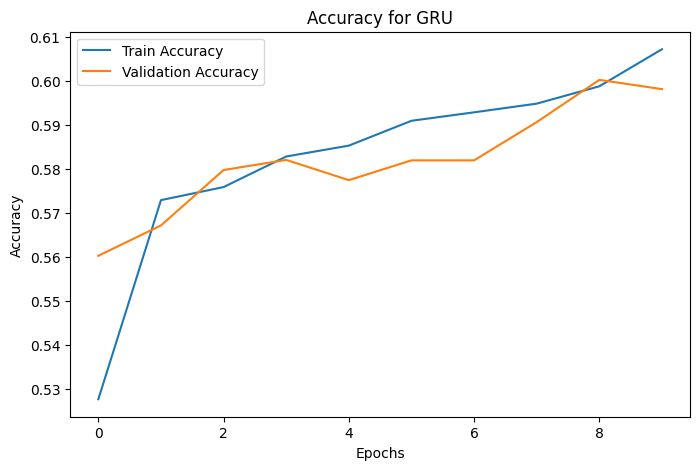

In [ ]:
plot_model_accuracy(gru_history, 'GRU')

## Part 5. BiLSTM

In [ ]:
 from tensorflow.keras.layers import Bidirectional

def build_bilstm_model(input_dim, output_dim=256):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=output_dim, input_length=1000),
        Bidirectional(LSTM(units=output_dim)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

bilstm_model = build_bilstm_model(input_dim=1000)


In [ ]:
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 105s 656ms/step - accuracy: 0.5368 - loss: 0.6893 - val_accuracy: 0.5764 - val_loss: 0.6754
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 104s 663ms/step - accuracy: 0.5773 - loss: 0.6730 - val_accuracy: 0.5968 - val_loss: 0.6627
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 145s 684ms/step - accuracy: 0.5885 - loss: 0.6686 - val_accuracy: 0.5996 - val_loss: 0.6610
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 672ms/step - accuracy: 0.6006 - loss: 0.6601 - val_accuracy: 0.6086 - val_loss: 0.6549
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 108s 685ms/step - accuracy: 0.6063 - loss: 0.6583 - val_accuracy: 0.6061 - val_loss: 0.6623
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 683ms/step - accuracy: 0.5931 - loss: 0.6622 - val_accuracy: 0.6073 - val_loss: 0.6553
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 106s 675ms/step - accuracy: 0.6120 - loss: 0.6512 - val_accuracy: 0.6102 - val_loss: 0.6513
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 143s 679ms/step - accuracy: 0.6153 -

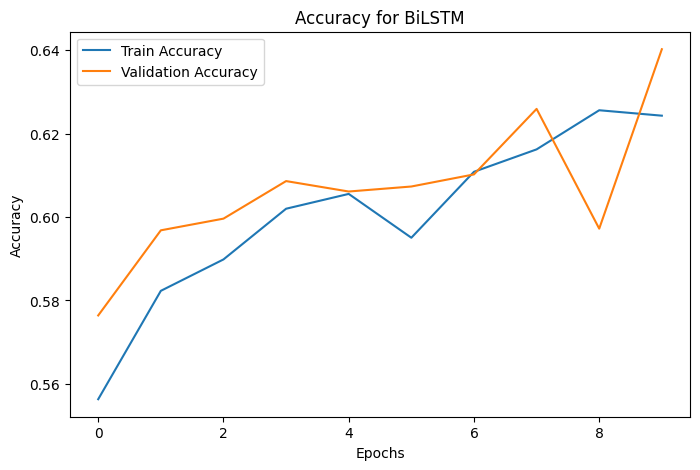

In [ ]:
plot_model_accuracy(bilstm_history, 'BiLSTM')

## Part 6. Compare

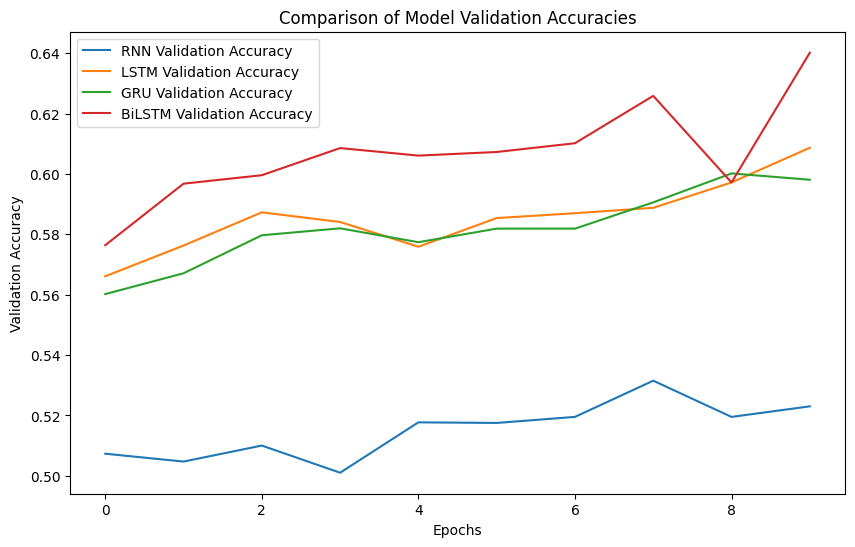

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.plot(bilstm_history.history['val_accuracy'], label='BiLSTM Validation Accuracy')
plt.title('Comparison of Model Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

From the graph, we can see that BiLSTM has the best performance, then LSTM and GRU have great performance. RNN has the worest performance

# Problem 2

## Part 1

In [ ]:

import torch
from torch.jit import script, trace
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import csv
import random
import re
import os
import unicodedata
import codecs
from io import open
import itertools
import math
import json


USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")

In [ ]:
import os
original_path = os.path.expanduser("~/.convokit/downloads/movie-corpus/")

target_path = os.path.join("data", "movie-corpus")
if not os.path.exists(target_path):
    os.makedirs("data", exist_ok=True)
    os.symlink(original_path, target_path)




In [ ]:

corpus_name = "movie-corpus"
corpus = os.path.join("data", corpus_name)

def printLines(file, n=10):
    with open(file, 'rb') as datafile:
        lines = datafile.readlines()
    for line in lines[:n]:
        print(line)

printLines(os.path.join(corpus, "utterances.jsonl"))

b'{"id": "L1045", "conversation_id": "L1044", "text": "They do not!", "speaker": "u0", "meta": {"movie_id": "m0", "parsed": [{"rt": 1, "toks": [{"tok": "They", "tag": "PRP", "dep": "nsubj", "up": 1, "dn": []}, {"tok": "do", "tag": "VBP", "dep": "ROOT", "dn": [0, 2, 3]}, {"tok": "not", "tag": "RB", "dep": "neg", "up": 1, "dn": []}, {"tok": "!", "tag": ".", "dep": "punct", "up": 1, "dn": []}]}]}, "reply-to": "L1044", "timestamp": null, "vectors": []}\n'
b'{"id": "L1044", "conversation_id": "L1044", "text": "They do to!", "speaker": "u2", "meta": {"movie_id": "m0", "parsed": [{"rt": 1, "toks": [{"tok": "They", "tag": "PRP", "dep": "nsubj", "up": 1, "dn": []}, {"tok": "do", "tag": "VBP", "dep": "ROOT", "dn": [0, 2, 3]}, {"tok": "to", "tag": "TO", "dep": "dobj", "up": 1, "dn": []}, {"tok": "!", "tag": ".", "dep": "punct", "up": 1, "dn": []}]}]}, "reply-to": null, "timestamp": null, "vectors": []}\n'
b'{"id": "L985", "conversation_id": "L984", "text": "I hope so.", "speaker": "u0", "meta": {

In [ ]:
# Splits each line of the file to create lines and conversations
def loadLinesAndConversations(fileName):
    lines = {}
    conversations = {}
    with open(fileName, 'r', encoding='iso-8859-1') as f:
        for line in f:
            lineJson = json.loads(line)
            # Extract fields for line object
            lineObj = {}
            lineObj["lineID"] = lineJson["id"]
            lineObj["characterID"] = lineJson["speaker"]
            lineObj["text"] = lineJson["text"]
            lines[lineObj['lineID']] = lineObj

            # Extract fields for conversation object
            if lineJson["conversation_id"] not in conversations:
                convObj = {}
                convObj["conversationID"] = lineJson["conversation_id"]
                convObj["movieID"] = lineJson["meta"]["movie_id"]
                convObj["lines"] = [lineObj]
            else:
                convObj = conversations[lineJson["conversation_id"]]
                convObj["lines"].insert(0, lineObj)
            conversations[convObj["conversationID"]] = convObj

    return lines, conversations


# Extracts pairs of sentences from conversations
def extractSentencePairs(conversations):
    qa_pairs = []
    for conversation in conversations.values():
        # Iterate over all the lines of the conversation
        for i in range(len(conversation["lines"]) - 1):  # We ignore the last line (no answer for it)
            inputLine = conversation["lines"][i]["text"].strip()
            targetLine = conversation["lines"][i+1]["text"].strip()
            # Filter wrong samples (if one of the lists is empty)
            if inputLine and targetLine:
                qa_pairs.append([inputLine, targetLine])
    return qa_pairs

In [ ]:
# Define path to new file
datafile = os.path.join(corpus, "formatted_movie_lines.txt")

delimiter = '\t'
# Unescape the delimiter
delimiter = str(codecs.decode(delimiter, "unicode_escape"))

# Initialize lines dict and conversations dict
lines = {}
conversations = {}
# Load lines and conversations
print("\nProcessing corpus into lines and conversations...")
lines, conversations = loadLinesAndConversations(os.path.join(corpus, "utterances.jsonl"))

# Write new csv file
print("\nWriting newly formatted file...")
with open(datafile, 'w', encoding='utf-8') as outputfile:
    writer = csv.writer(outputfile, delimiter=delimiter, lineterminator='\n')
    for pair in extractSentencePairs(conversations):
        writer.writerow(pair)

# Print a sample of lines
print("\nSample lines from file:")
printLines(datafile)


Processing corpus into lines and conversations...

Writing newly formatted file...

Sample lines from file:
b'They do to!\tThey do not!\n'
b'She okay?\tI hope so.\n'
b"Wow\tLet's go.\n"
b'"I\'m kidding.  You know how sometimes you just become this ""persona""?  And you don\'t know how to quit?"\tNo\n'
b"No\tOkay -- you're gonna need to learn how to lie.\n"
b"I figured you'd get to the good stuff eventually.\tWhat good stuff?\n"
b'What good stuff?\t"The ""real you""."\n'
b'"The ""real you""."\tLike my fear of wearing pastels?\n'
b'do you listen to this crap?\tWhat crap?\n'
b"What crap?\tMe.  This endless ...blonde babble. I'm like, boring myself.\n"


In [ ]:
# Default word tokens
PAD_token = 0  # Used for padding short sentences
SOS_token = 1  # Start-of-sentence token
EOS_token = 2  # End-of-sentence token

class Voc:
    def __init__(self, name):
        self.name = name
        self.trimmed = False
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3  # Count SOS, EOS, PAD

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            self.word2count[word] += 1

    # Remove words below a certain count threshold
    def trim(self, min_count):
        if self.trimmed:
            return
        self.trimmed = True

        keep_words = []

        for k, v in self.word2count.items():
            if v >= min_count:
                keep_words.append(k)

        print('keep_words {} / {} = {:.4f}'.format(
            len(keep_words), len(self.word2index), len(keep_words) / len(self.word2index)
        ))

        # Reinitialize dictionaries
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3 # Count default tokens

        for word in keep_words:
            self.addWord(word)

In [ ]:
MAX_LENGTH = 10  # Maximum sentence length to consider

# Turn a Unicode string to plain ASCII, thanks to
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    s = re.sub(r"\s+", r" ", s).strip()
    return s

# Read query/response pairs and return a voc object
def readVocs(datafile, corpus_name):
    print("Reading lines...")
    # Read the file and split into lines
    lines = open(datafile, encoding='utf-8').\
        read().strip().split('\n')
    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]
    voc = Voc(corpus_name)
    return voc, pairs

# Returns True if both sentences in a pair 'p' are under the MAX_LENGTH threshold
def filterPair(p):
    # Input sequences need to preserve the last word for EOS token
    return len(p[0].split(' ')) < MAX_LENGTH and len(p[1].split(' ')) < MAX_LENGTH

# Filter pairs using the ``filterPair`` condition
def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

# Using the functions defined above, return a populated voc object and pairs list
def loadPrepareData(corpus, corpus_name, datafile, save_dir):
    print("Start preparing training data ...")
    voc, pairs = readVocs(datafile, corpus_name)
    print("Read {!s} sentence pairs".format(len(pairs)))
    pairs = filterPairs(pairs)
    print("Trimmed to {!s} sentence pairs".format(len(pairs)))
    print("Counting words...")
    for pair in pairs:
        voc.addSentence(pair[0])
        voc.addSentence(pair[1])
    print("Counted words:", voc.num_words)
    return voc, pairs


# Load/Assemble voc and pairs
save_dir = os.path.join("data", "save")
voc, pairs = loadPrepareData(corpus, corpus_name, datafile, save_dir)
# Print some pairs to validate
print("\npairs:")
for pair in pairs[:10]:
    print(pair)

Start preparing training data ...
Reading lines...
Read 221282 sentence pairs
Trimmed to 64313 sentence pairs
Counting words...
Counted words: 18082

pairs:
['they do to !', 'they do not !']
['she okay ?', 'i hope so .']
['wow', 'let s go .']
['what good stuff ?', 'the real you .']
['the real you .', 'like my fear of wearing pastels ?']
['do you listen to this crap ?', 'what crap ?']
['well no . . .', 'then that s all you had to say .']
['then that s all you had to say .', 'but']
['but', 'you always been this selfish ?']
['have fun tonight ?', 'tons']


In [ ]:
MIN_COUNT = 3    # Minimum word count threshold for trimming

def trimRareWords(voc, pairs, MIN_COUNT):
    # Trim words used under the MIN_COUNT from the voc
    voc.trim(MIN_COUNT)
    # Filter out pairs with trimmed words
    keep_pairs = []
    for pair in pairs:
        input_sentence = pair[0]
        output_sentence = pair[1]
        keep_input = True
        keep_output = True
        # Check input sentence
        for word in input_sentence.split(' '):
            if word not in voc.word2index:
                keep_input = False
                break
        # Check output sentence
        for word in output_sentence.split(' '):
            if word not in voc.word2index:
                keep_output = False
                break

        # Only keep pairs that do not contain trimmed word(s) in their input or output sentence
        if keep_input and keep_output:
            keep_pairs.append(pair)

    print("Trimmed from {} pairs to {}, {:.4f} of total".format(len(pairs), len(keep_pairs), len(keep_pairs) / len(pairs)))
    return keep_pairs


# Trim voc and pairs
pairs = trimRareWords(voc, pairs, MIN_COUNT)

keep_words 7833 / 18079 = 0.4333
Trimmed from 64313 pairs to 53131, 0.8261 of total


In [ ]:
def indexesFromSentence(voc, sentence):
    return [voc.word2index[word] for word in sentence.split(' ')] + [EOS_token]


def zeroPadding(l, fillvalue=PAD_token):
    return list(itertools.zip_longest(*l, fillvalue=fillvalue))

def binaryMatrix(l, value=PAD_token):
    m = []
    for i, seq in enumerate(l):
        m.append([])
        for token in seq:
            if token == PAD_token:
                m[i].append(0)
            else:
                m[i].append(1)
    return m

# Returns padded input sequence tensor and lengths
def inputVar(l, voc):
    indexes_batch = [indexesFromSentence(voc, sentence) for sentence in l]
    lengths = torch.tensor([len(indexes) for indexes in indexes_batch])
    padList = zeroPadding(indexes_batch)
    padVar = torch.LongTensor(padList)
    return padVar, lengths

# Returns padded target sequence tensor, padding mask, and max target length
def outputVar(l, voc):
    indexes_batch = [indexesFromSentence(voc, sentence) for sentence in l]
    max_target_len = max([len(indexes) for indexes in indexes_batch])
    padList = zeroPadding(indexes_batch)
    mask = binaryMatrix(padList)
    mask = torch.BoolTensor(mask)
    padVar = torch.LongTensor(padList)
    return padVar, mask, max_target_len

# Returns all items for a given batch of pairs
def batch2TrainData(voc, pair_batch):
    pair_batch.sort(key=lambda x: len(x[0].split(" ")), reverse=True)
    input_batch, output_batch = [], []
    for pair in pair_batch:
        input_batch.append(pair[0])
        output_batch.append(pair[1])
    inp, lengths = inputVar(input_batch, voc)
    output, mask, max_target_len = outputVar(output_batch, voc)
    return inp, lengths, output, mask, max_target_len


# Example for validation
small_batch_size = 5
batches = batch2TrainData(voc, [random.choice(pairs) for _ in range(small_batch_size)])
input_variable, lengths, target_variable, mask, max_target_len = batches

print("input_variable:", input_variable)
print("lengths:", lengths)
print("target_variable:", target_variable)
print("mask:", mask)
print("max_target_len:", max_target_len)

input_variable: tensor([[  67,  175,   19,   19,  217],
        [  90,  180,   90,   84,   14],
        [   8,  556,   79,   22,    2],
        [  10,  109,  708, 2344,    0],
        [  67,   92,   10,   10,    0],
        [  17,   66,    2,    2,    0],
        [6220,   10,    0,    0,    0],
        [  10,    2,    0,    0,    0],
        [   2,    0,    0,    0,    0]])
lengths: tensor([9, 8, 6, 6, 3])
target_variable: tensor([[ 378,   66,   26,  211,   19],
        [  72,  109,  708,   85,  217],
        [  36,  185,   90,   14,   90],
        [ 279,  557,  585,    2,   85],
        [ 691,  558, 4776,    0,  112],
        [  26,  154,   28,    0,   10],
        [ 876,   31, 7413,    0,    2],
        [   2,  138,    6,    0,    0],
        [   0,   14,    2,    0,    0],
        [   0,    2,    0,    0,    0]])
mask: tensor([[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, hidden_size, embedding, n_layers=1, dropout=0):
        super(EncoderRNN, self).__init__()
        self.n_layers = n_layers
        self.hidden_size = hidden_size
        self.embedding = embedding

        # Initialize GRU; the input_size and hidden_size parameters are both set to 'hidden_size'
        #   because our input size is a word embedding with number of features == hidden_size
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers,
                          dropout=(0 if n_layers == 1 else dropout), bidirectional=True)

    def forward(self, input_seq, input_lengths, hidden=None):
        # Convert word indexes to embeddings
        embedded = self.embedding(input_seq)
        # Pack padded batch of sequences for RNN module
        packed = nn.utils.rnn.pack_padded_sequence(embedded, input_lengths)
        # Forward pass through GRU
        outputs, hidden = self.gru(packed, hidden)
        # Unpack padding
        outputs, _ = nn.utils.rnn.pad_packed_sequence(outputs)
        # Sum bidirectional GRU outputs
        outputs = outputs[:, :, :self.hidden_size] + outputs[:, : ,self.hidden_size:]
        # Return output and final hidden state
        return outputs, hidden

In [ ]:
# Luong attention layer
class Attn(nn.Module):
    def __init__(self, method, hidden_size):
        super(Attn, self).__init__()
        self.method = method
        if self.method not in ['dot', 'general', 'concat']:
            raise ValueError(self.method, "is not an appropriate attention method.")
        self.hidden_size = hidden_size
        if self.method == 'general':
            self.attn = nn.Linear(self.hidden_size, hidden_size)
        elif self.method == 'concat':
            self.attn = nn.Linear(self.hidden_size * 2, hidden_size)
            self.v = nn.Parameter(torch.FloatTensor(hidden_size))

    def dot_score(self, hidden, encoder_output):
        return torch.sum(hidden * encoder_output, dim=2)

    def general_score(self, hidden, encoder_output):
        energy = self.attn(encoder_output)
        return torch.sum(hidden * energy, dim=2)

    def concat_score(self, hidden, encoder_output):
        energy = self.attn(torch.cat((hidden.expand(encoder_output.size(0), -1, -1), encoder_output), 2)).tanh()
        return torch.sum(self.v * energy, dim=2)

    def forward(self, hidden, encoder_outputs):
        # Calculate the attention weights (energies) based on the given method
        if self.method == 'general':
            attn_energies = self.general_score(hidden, encoder_outputs)
        elif self.method == 'concat':
            attn_energies = self.concat_score(hidden, encoder_outputs)
        elif self.method == 'dot':
            attn_energies = self.dot_score(hidden, encoder_outputs)

        # Transpose max_length and batch_size dimensions
        attn_energies = attn_energies.t()

        # Return the softmax normalized probability scores (with added dimension)
        return F.softmax(attn_energies, dim=1).unsqueeze(1)

In [ ]:
class LuongAttnDecoderRNN(nn.Module):
    def __init__(self, attn_model, embedding, hidden_size, output_size, n_layers=1, dropout=0.1):
        super(LuongAttnDecoderRNN, self).__init__()

        # Keep for reference
        self.attn_model = attn_model
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.dropout = dropout

        # Define layers
        self.embedding = embedding
        self.embedding_dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers, dropout=(0 if n_layers == 1 else dropout))
        self.concat = nn.Linear(hidden_size * 2, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

        self.attn = Attn(attn_model, hidden_size)

    def forward(self, input_step, last_hidden, encoder_outputs):
        # Note: we run this one step (word) at a time
        # Get embedding of current input word
        embedded = self.embedding(input_step)
        embedded = self.embedding_dropout(embedded)
        # Forward through unidirectional GRU
        rnn_output, hidden = self.gru(embedded, last_hidden)
        # Calculate attention weights from the current GRU output
        attn_weights = self.attn(rnn_output, encoder_outputs)
        # Multiply attention weights to encoder outputs to get new "weighted sum" context vector
        context = attn_weights.bmm(encoder_outputs.transpose(0, 1))
        # Concatenate weighted context vector and GRU output using Luong eq. 5
        rnn_output = rnn_output.squeeze(0)
        context = context.squeeze(1)
        concat_input = torch.cat((rnn_output, context), 1)
        concat_output = torch.tanh(self.concat(concat_input))
        # Predict next word using Luong eq. 6
        output = self.out(concat_output)
        output = F.softmax(output, dim=1)
        # Return output and final hidden state
        return output, hidden

In [ ]:
def maskNLLLoss(inp, target, mask):
    nTotal = mask.sum()
    crossEntropy = -torch.log(torch.gather(inp, 1, target.view(-1, 1)).squeeze(1))
    loss = crossEntropy.masked_select(mask).mean()
    loss = loss.to(device)
    return loss, nTotal.item()

In [ ]:
def train(input_variable, lengths, target_variable, mask, max_target_len, encoder, decoder, embedding,
          encoder_optimizer, decoder_optimizer, batch_size, clip, max_length=MAX_LENGTH):

    # Zero gradients
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Set device options
    input_variable = input_variable.to(device)
    target_variable = target_variable.to(device)
    mask = mask.to(device)
    # Lengths for RNN packing should always be on the CPU
    lengths = lengths.to("cpu")

    # Initialize variables
    loss = 0
    print_losses = []
    n_totals = 0

    # Forward pass through encoder
    encoder_outputs, encoder_hidden = encoder(input_variable, lengths)

    # Create initial decoder input (start with SOS tokens for each sentence)
    decoder_input = torch.LongTensor([[SOS_token for _ in range(batch_size)]])
    decoder_input = decoder_input.to(device)

    # Set initial decoder hidden state to the encoder's final hidden state
    decoder_hidden = encoder_hidden[:decoder.n_layers]

    # Determine if we are using teacher forcing this iteration
    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    # Forward batch of sequences through decoder one time step at a time
    if use_teacher_forcing:
        for t in range(max_target_len):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden, encoder_outputs
            )
            # Teacher forcing: next input is current target
            decoder_input = target_variable[t].view(1, -1)
            # Calculate and accumulate loss
            mask_loss, nTotal = maskNLLLoss(decoder_output, target_variable[t], mask[t])
            loss += mask_loss
            print_losses.append(mask_loss.item() * nTotal)
            n_totals += nTotal
    else:
        for t in range(max_target_len):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden, encoder_outputs
            )
            # No teacher forcing: next input is decoder's own current output
            _, topi = decoder_output.topk(1)
            decoder_input = torch.LongTensor([[topi[i][0] for i in range(batch_size)]])
            decoder_input = decoder_input.to(device)
            # Calculate and accumulate loss
            mask_loss, nTotal = maskNLLLoss(decoder_output, target_variable[t], mask[t])
            loss += mask_loss
            print_losses.append(mask_loss.item() * nTotal)
            n_totals += nTotal

    # Perform backpropagation
    loss.backward()

    # Clip gradients: gradients are modified in place
    _ = nn.utils.clip_grad_norm_(encoder.parameters(), clip)
    _ = nn.utils.clip_grad_norm_(decoder.parameters(), clip)

    # Adjust model weights
    encoder_optimizer.step()
    decoder_optimizer.step()

    return sum(print_losses) / n_totals

In [ ]:
def trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer, embedding, encoder_n_layers, decoder_n_layers, save_dir, n_iteration, batch_size, print_every, save_every, clip, corpus_name, loadFilename):

    # Load batches for each iteration
    training_batches = [batch2TrainData(voc, [random.choice(pairs) for _ in range(batch_size)])
                      for _ in range(n_iteration)]

    # Initializations
    print('Initializing ...')
    start_iteration = 1
    print_loss = 0
    if loadFilename:
        start_iteration = checkpoint['iteration'] + 1

    # Training loop
    print("Training...")
    for iteration in range(start_iteration, n_iteration + 1):
        training_batch = training_batches[iteration - 1]
        # Extract fields from batch
        input_variable, lengths, target_variable, mask, max_target_len = training_batch

        # Run a training iteration with batch
        loss = train(input_variable, lengths, target_variable, mask, max_target_len, encoder,
                     decoder, embedding, encoder_optimizer, decoder_optimizer, batch_size, clip)
        print_loss += loss

        # Print progress
        if iteration % print_every == 0:
            print_loss_avg = print_loss / print_every
            print("Iteration: {}; Percent complete: {:.1f}%; Average loss: {:.4f}".format(iteration, iteration / n_iteration * 100, print_loss_avg))
            print_loss = 0

        # Save checkpoint
        if (iteration % save_every == 0):
            directory = os.path.join(save_dir, model_name, corpus_name, '{}-{}_{}'.format(encoder_n_layers, decoder_n_layers, hidden_size))
            if not os.path.exists(directory):
                os.makedirs(directory)
            torch.save({
                'iteration': iteration,
                'en': encoder.state_dict(),
                'de': decoder.state_dict(),
                'en_opt': encoder_optimizer.state_dict(),
                'de_opt': decoder_optimizer.state_dict(),
                'loss': loss,
                'voc_dict': voc.__dict__,
                'embedding': embedding.state_dict()
            }, os.path.join(directory, '{}_{}.tar'.format(iteration, 'checkpoint')))

In [ ]:
class GreedySearchDecoder(nn.Module):
    def __init__(self, encoder, decoder):
        super(GreedySearchDecoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, input_seq, input_length, max_length):
        # Forward input through encoder model
        encoder_outputs, encoder_hidden = self.encoder(input_seq, input_length)
        # Prepare encoder's final hidden layer to be first hidden input to the decoder
        decoder_hidden = encoder_hidden[:decoder.n_layers]
        # Initialize decoder input with SOS_token
        decoder_input = torch.ones(1, 1, device=device, dtype=torch.long) * SOS_token
        # Initialize tensors to append decoded words to
        all_tokens = torch.zeros([0], device=device, dtype=torch.long)
        all_scores = torch.zeros([0], device=device)
        # Iteratively decode one word token at a time
        for _ in range(max_length):
            # Forward pass through decoder
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden, encoder_outputs)
            # Obtain most likely word token and its softmax score
            decoder_scores, decoder_input = torch.max(decoder_output, dim=1)
            # Record token and score
            all_tokens = torch.cat((all_tokens, decoder_input), dim=0)
            all_scores = torch.cat((all_scores, decoder_scores), dim=0)
            # Prepare current token to be next decoder input (add a dimension)
            decoder_input = torch.unsqueeze(decoder_input, 0)
        # Return collections of word tokens and scores
        return all_tokens, all_scores

In [ ]:
def evaluate(encoder, decoder, searcher, voc, sentence, max_length=MAX_LENGTH):
    ### Format input sentence as a batch
    # words -> indexes
    indexes_batch = [indexesFromSentence(voc, sentence)]
    # Create lengths tensor
    lengths = torch.tensor([len(indexes) for indexes in indexes_batch])
    # Transpose dimensions of batch to match models' expectations
    input_batch = torch.LongTensor(indexes_batch).transpose(0, 1)
    # Use appropriate device
    input_batch = input_batch.to(device)
    lengths = lengths.to("cpu")
    # Decode sentence with searcher
    tokens, scores = searcher(input_batch, lengths, max_length)
    # indexes -> words
    decoded_words = [voc.index2word[token.item()] for token in tokens]
    return decoded_words


def evaluateInput(encoder, decoder, searcher, voc):
    input_sentence = ''
    while(1):
        try:
            # Get input sentence
            input_sentence = input('> ')
            # Check if it is quit case
            if input_sentence == 'q' or input_sentence == 'quit': break
            # Normalize sentence
            input_sentence = normalizeString(input_sentence)
            # Evaluate sentence
            output_words = evaluate(encoder, decoder, searcher, voc, input_sentence)
            # Format and print response sentence
            output_words[:] = [x for x in output_words if not (x == 'EOS' or x == 'PAD')]
            print('Bot:', ' '.join(output_words))

        except KeyError:
            print("Error: Encountered unknown word.")

In [ ]:
# Configure models
model_name = 'cb_model'
attn_model = 'dot'
#``attn_model = 'general'``
#``attn_model = 'concat'``
hidden_size = 500
encoder_n_layers = 2
decoder_n_layers = 2
dropout = 0.1
batch_size = 64

# Set checkpoint to load from; set to None if starting from scratch
loadFilename = None
checkpoint_iter = 4000

In [ ]:
# loadFilename = os.path.join(save_dir, model_name, corpus_name,
#                     '{}-{}_{}'.format(encoder_n_layers, decoder_n_layers, hidden_size),
#                     '{}_checkpoint.tar'.format(checkpoint_iter))

In [ ]:
# Load model if a ``loadFilename`` is provided
if loadFilename:
    # If loading on same machine the model was trained on
    checkpoint = torch.load(loadFilename)
    # If loading a model trained on GPU to CPU
    #checkpoint = torch.load(loadFilename, map_location=torch.device('cpu'))
    encoder_sd = checkpoint['en']
    decoder_sd = checkpoint['de']
    encoder_optimizer_sd = checkpoint['en_opt']
    decoder_optimizer_sd = checkpoint['de_opt']
    embedding_sd = checkpoint['embedding']
    voc.__dict__ = checkpoint['voc_dict']


print('Building encoder and decoder ...')
# Initialize word embeddings
embedding = nn.Embedding(voc.num_words, hidden_size)
if loadFilename:
    embedding.load_state_dict(embedding_sd)
# Initialize encoder & decoder models
encoder = EncoderRNN(hidden_size, embedding, encoder_n_layers, dropout)
decoder = LuongAttnDecoderRNN(attn_model, embedding, hidden_size, voc.num_words, decoder_n_layers, dropout)
if loadFilename:
    encoder.load_state_dict(encoder_sd)
    decoder.load_state_dict(decoder_sd)
# Use appropriate device
encoder = encoder.to(device)
decoder = decoder.to(device)
print('Models built and ready to go!')

Building encoder and decoder ...
Models built and ready to go!


In [ ]:
# Configure training/optimization
clip = 50.0
teacher_forcing_ratio = 1.0
learning_rate = 0.0001
decoder_learning_ratio = 5.0
n_iteration = 4000
print_every = 1
save_every = 500

# Ensure dropout layers are in train mode
encoder.train()
decoder.train()

# Initialize optimizers
print('Building optimizers ...')
encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate * decoder_learning_ratio)
if loadFilename:
    encoder_optimizer.load_state_dict(encoder_optimizer_sd)
    decoder_optimizer.load_state_dict(decoder_optimizer_sd)

# If you have CUDA, configure CUDA to call
for state in encoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

for state in decoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

# Run training iterations
print("Starting Training!")
trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer,
           embedding, encoder_n_layers, decoder_n_layers, save_dir, n_iteration, batch_size,
           print_every, save_every, clip, corpus_name, loadFilename)

Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 8.9787
Iteration: 2; Percent complete: 0.1%; Average loss: 8.8486
Iteration: 3; Percent complete: 0.1%; Average loss: 8.7040
Iteration: 4; Percent complete: 0.1%; Average loss: 8.4442
Iteration: 5; Percent complete: 0.1%; Average loss: 8.0479
Iteration: 6; Percent complete: 0.1%; Average loss: 7.4906
Iteration: 7; Percent complete: 0.2%; Average loss: 7.0988
Iteration: 8; Percent complete: 0.2%; Average loss: 6.9097
Iteration: 9; Percent complete: 0.2%; Average loss: 6.6905
Iteration: 10; Percent complete: 0.2%; Average loss: 6.4231
Iteration: 11; Percent complete: 0.3%; Average loss: 6.1152
Iteration: 12; Percent complete: 0.3%; Average loss: 5.9149
Iteration: 13; Percent complete: 0.3%; Average loss: 5.7668
Iteration: 14; Percent complete: 0.4%; Average loss: 5.7939
Iteration: 15; Percent complete: 0.4%; Average loss: 5.5762
Iteration: 16; Percent complete: 0.4%

In [ ]:
# Set dropout layers to ``eval`` mode
encoder.eval()
decoder.eval()

# Initialize search module
searcher = GreedySearchDecoder(encoder, decoder)

# Begin chatting (uncomment and run the following line to begin)


In [ ]:
evaluateInput(encoder, decoder, searcher, voc)

> hello
Bot: hello . . . . .
> where am I?
Bot: in the house . the lighthouse . .
> i am a lawyer
Bot: you re a liar . a minute ?
> who are you?
Bot: i m your cousin . . .
> how are you doing?
Bot: i m fine . . . .
> are you my friend?
Bot: i m not sure . . .
> you are under arrest
Bot: i m not . . .
> i'm just joking 
Bot: i m sorry . a minute .
> who are you
Bot: i m not a man . you ?
> what's your name
Bot: simpson . . . . .
> it's my time to leave
Bot: i m not going to kill him !
> it's time for me to leave
Bot: i m sorry i m sorry . it .
> You killed someone?
Bot: yeah . . . . .
> where and how
Bot: i don t know . . .
> goodbye
Bot: you re a good man . it .
> i know 
Bot: you re a liar . a minute ?
> goodbye
Bot: you re a good man . it .
> goodbye
Bot: you re a good man . it .
> goodbye
Bot: you re a good man . it .
> goodbye
Bot: you re a good man . it .
> goodbye
Bot: you re a good man . it .
> you are stupid
Bot: i m not . . .
> you are
Bot: i m not . . .
> good bye
Bot: good b

KeyboardInterrupt: Interrupted by user

## Part2

In [ ]:
!pip install wandb -Uq

In [ ]:
import wandb

In [ ]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: hangaocindy2022 (hangaocindy2022-new-york-university). Use `wandb login --relogin` to force relogin


True

## Part 3

In [ ]:
sweep_config = {
    'method': 'random'
    }

In [ ]:
metric = {
    'name': 'loss',
    'goal': 'minimize'
    }

sweep_config['metric'] = metric

In [ ]:
parameters_dict = {
    'learning_rate': {
        'values': [0.0001, 0.00025, 0.0005, 0.001]
    },
    'optimizer': {
        'values': ['adam', 'sgd']
    },
    'clip': {
        'values': [0, 25, 50, 100]
    },
    'teacher_forcing_ratio': {
        'values': [0, 0.5, 1.0]
    },
    'decoder_learning_ratio': {
        'values': [1.0, 3.0, 5.0, 10.0]
    }
}

sweep_config['parameters'] = parameters_dict

In [ ]:
# parameters_dict.update({
#     'epochs': {
#         'value': 50}
#     })

In [ ]:
import pprint
pprint.pprint(sweep_config)

{'method': 'random',
 'metric': {'goal': 'minimize', 'name': 'loss'},
 'parameters': {'clip': {'values': [0, 25, 50, 100]},
                'decoder_learning_ratio': {'values': [1.0, 3.0, 5.0, 10.0]},
                'learning_rate': {'values': [0.0001, 0.00025, 0.0005, 0.001]},
                'optimizer': {'values': ['adam', 'sgd']},
                'teacher_forcing_ratio': {'values': [0, 0.5, 1.0]}}}


In [ ]:
sweep_id = wandb.sweep(sweep_config, project="pytorch-sweeps-demo")

Create sweep with ID: yh6c04xk
Sweep URL: https://wandb.ai/hangaocindy2022-new-york-university/pytorch-sweeps-demo/sweeps/yh6c04xk


In [ ]:
def train(input_variable, lengths, target_variable, mask, max_target_len, encoder, decoder, embedding,
          encoder_optimizer, decoder_optimizer, batch_size, clip,teacher_forcing_ratio, max_length=MAX_LENGTH):

    # Zero gradients
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Set device options
    input_variable = input_variable.to(device)
    target_variable = target_variable.to(device)
    mask = mask.to(device)
    # Lengths for RNN packing should always be on the CPU
    lengths = lengths.to("cpu")

    # Initialize variables
    loss = 0
    print_losses = []
    n_totals = 0

    # Forward pass through encoder
    encoder_outputs, encoder_hidden = encoder(input_variable, lengths)

    # Create initial decoder input (start with SOS tokens for each sentence)
    decoder_input = torch.LongTensor([[SOS_token for _ in range(batch_size)]])
    decoder_input = decoder_input.to(device)

    # Set initial decoder hidden state to the encoder's final hidden state
    decoder_hidden = encoder_hidden[:decoder.n_layers]

    # Determine if we are using teacher forcing this iteration
    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    # Forward batch of sequences through decoder one time step at a time
    if use_teacher_forcing:
        for t in range(max_target_len):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden, encoder_outputs
            )
            # Teacher forcing: next input is current target
            decoder_input = target_variable[t].view(1, -1)
            # Calculate and accumulate loss
            mask_loss, nTotal = maskNLLLoss(decoder_output, target_variable[t], mask[t])
            loss += mask_loss
            print_losses.append(mask_loss.item() * nTotal)
            n_totals += nTotal
    else:
        for t in range(max_target_len):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden, encoder_outputs
            )
            # No teacher forcing: next input is decoder's own current output
            _, topi = decoder_output.topk(1)
            decoder_input = torch.LongTensor([[topi[i][0] for i in range(batch_size)]])
            decoder_input = decoder_input.to(device)
            # Calculate and accumulate loss
            mask_loss, nTotal = maskNLLLoss(decoder_output, target_variable[t], mask[t])
            loss += mask_loss
            print_losses.append(mask_loss.item() * nTotal)
            n_totals += nTotal

    # Perform backpropagation
    loss.backward()

    # Clip gradients: gradients are modified in place
    _ = nn.utils.clip_grad_norm_(encoder.parameters(), clip)
    _ = nn.utils.clip_grad_norm_(decoder.parameters(), clip)

    # Adjust model weights
    encoder_optimizer.step()
    decoder_optimizer.step()

    return sum(print_losses) / n_totals

In [ ]:
def trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer, embedding, encoder_n_layers, decoder_n_layers, save_dir,
               n_iteration, batch_size, print_every, save_every, clip, teacher_forcing_ratio, corpus_name, loadFilename):

    # Load batches for each iteration
    training_batches = [batch2TrainData(voc, [random.choice(pairs) for _ in range(batch_size)])
                      for _ in range(n_iteration)]

    # Initializations
    print('Initializing ...')
    start_iteration = 1
    print_loss = 0
    if loadFilename:
        start_iteration = checkpoint['iteration'] + 1

    # Training loop
    print("Training...")
    for iteration in range(start_iteration, n_iteration + 1):
        training_batch = training_batches[iteration - 1]
        # Extract fields from batch
        input_variable, lengths, target_variable, mask, max_target_len = training_batch

        # Run a training iteration with batch
        loss = train(input_variable, lengths, target_variable, mask, max_target_len, encoder,
                     decoder, embedding, encoder_optimizer, decoder_optimizer, batch_size, clip,teacher_forcing_ratio,)
        print_loss += loss
        wandb.log({"loss": loss})

        # Print progress
        if iteration % print_every == 0:
            print_loss_avg = print_loss / print_every
            print("Iteration: {}; Percent complete: {:.1f}%; Average loss: {:.4f}".format(iteration, iteration / n_iteration * 100, print_loss_avg))
            print_loss = 0
            wandb.log({"loss": print_loss_avg})

        # Save checkpoint
        if (iteration % save_every == 0):
            directory = os.path.join(save_dir, model_name, corpus_name, '{}-{}_{}'.format(encoder_n_layers, decoder_n_layers, hidden_size))
            if not os.path.exists(directory):
                os.makedirs(directory)
            torch.save({
                'iteration': iteration,
                'en': encoder.state_dict(),
                'de': decoder.state_dict(),
                'en_opt': encoder_optimizer.state_dict(),
                'de_opt': decoder_optimizer.state_dict(),
                'loss': loss,
                'voc_dict': voc.__dict__,
                'embedding': embedding.state_dict()
            }, os.path.join(directory, '{}_{}.tar'.format(iteration, 'checkpoint')))

In [ ]:
def train_with_sweep(config=None):

    # Initialize a new wandb run
    with wandb.init(config=config):
        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config

        # Configure training/optimization
        learning_rate = config.learning_rate
        clip = config.clip
        teacher_forcing_ratio = config.teacher_forcing_ratio
        decoder_learning_ratio = config.decoder_learning_ratio
        n_iteration = 4000
        print_every = 1
        save_every = 500

        optimizer_map = {
                'adam': torch.optim.Adam,
                'sgd': torch.optim.SGD
            }
        optimizer_class = optimizer_map[config.optimizer]


        print('Building optimizers ...')
        encoder_optimizer = optimizer_class(encoder.parameters(), lr=learning_rate)
        decoder_optimizer = optimizer_class(decoder.parameters(), lr=learning_rate * decoder_learning_ratio)
        if loadFilename:
            encoder_optimizer.load_state_dict(encoder_optimizer_sd)
            decoder_optimizer.load_state_dict(decoder_optimizer_sd)

        # If you have CUDA, configure CUDA to call
        for state in encoder_optimizer.state.values():
            for k, v in state.items():
                if isinstance(v, torch.Tensor):
                    state[k] = v.cuda()

        for state in decoder_optimizer.state.values():
          for k, v in state.items():
              if isinstance(v, torch.Tensor):
                  state[k] = v.cuda()

        # Run training iterations
        print("Starting Training!")
        trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer,
                  embedding, encoder_n_layers, decoder_n_layers, save_dir, n_iteration, batch_size,
                  print_every, save_every, clip, teacher_forcing_ratio,  corpus_name, loadFilename)

        wandb.log({"training_done": True})



In [ ]:
wandb.agent(sweep_id, train_with_sweep, count=1)

wandb: Agent Starting Run: xtxdehdj with config:
wandb: 	clip: 0
wandb: 	decoder_learning_ratio: 1
wandb: 	learning_rate: 0.00025
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 0.5


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 3.3929
Iteration: 2; Percent complete: 0.1%; Average loss: 4.1682
Iteration: 3; Percent complete: 0.1%; Average loss: 3.5746
Iteration: 4; Percent complete: 0.1%; Average loss: 3.1918
Iteration: 5; Percent complete: 0.1%; Average loss: 4.4231
Iteration: 6; Percent complete: 0.1%; Average loss: 3.3974
Iteration: 7; Percent complete: 0.2%; Average loss: 4.3145
Iteration: 8; Percent complete: 0.2%; Average loss: 3.2136
Iteration: 9; Percent complete: 0.2%; Average loss: 3.5052
Iteration: 10; Percent complete: 0.2%; Average loss: 3.5082
Iteration: 11; Percent complete: 0.3%; Average loss: 3.2824
Iteration: 12; Percent complete: 0.3%; Average loss: 4.2748
Iteration: 13; Percent complete: 0.3%; Average loss: 4.3754
Iteration: 14; Percent complete: 0.4%; Average loss: 4.1451
Iteration: 15; Percent complete: 0.4%; Average loss: 4.2836
Iteration: 16; Percent complete: 0.4%

In [ ]:
wandb.agent(sweep_id, train_with_sweep, count=20)

wandb: Agent Starting Run: fdnqutex with config:
wandb: 	clip: 100
wandb: 	decoder_learning_ratio: 5
wandb: 	learning_rate: 0.0005
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 1


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 3.0302
Iteration: 2; Percent complete: 0.1%; Average loss: 3.4717
Iteration: 3; Percent complete: 0.1%; Average loss: 3.3126
Iteration: 4; Percent complete: 0.1%; Average loss: 3.4683
Iteration: 5; Percent complete: 0.1%; Average loss: 3.9630
Iteration: 6; Percent complete: 0.1%; Average loss: 3.3798
Iteration: 7; Percent complete: 0.2%; Average loss: 3.5520
Iteration: 8; Percent complete: 0.2%; Average loss: 3.7328
Iteration: 9; Percent complete: 0.2%; Average loss: 3.7583
Iteration: 10; Percent complete: 0.2%; Average loss: 3.4037
Iteration: 11; Percent complete: 0.3%; Average loss: 3.5354
Iteration: 12; Percent complete: 0.3%; Average loss: 3.4823
Iteration: 13; Percent complete: 0.3%; Average loss: 4.0118
Iteration: 14; Percent complete: 0.4%; Average loss: 3.4806
Iteration: 15; Percent complete: 0.4%; Average loss: 3.9392
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: iw8qxtu6 with config:
wandb: 	clip: 25
wandb: 	decoder_learning_ratio: 3
wandb: 	learning_rate: 0.00025
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 0.5


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 5.7532
Iteration: 2; Percent complete: 0.1%; Average loss: 2.4345
Iteration: 3; Percent complete: 0.1%; Average loss: 5.5888
Iteration: 4; Percent complete: 0.1%; Average loss: 5.5559
Iteration: 5; Percent complete: 0.1%; Average loss: 2.2664
Iteration: 6; Percent complete: 0.1%; Average loss: 5.6542
Iteration: 7; Percent complete: 0.2%; Average loss: 5.7572
Iteration: 8; Percent complete: 0.2%; Average loss: 5.6788
Iteration: 9; Percent complete: 0.2%; Average loss: 2.2938
Iteration: 10; Percent complete: 0.2%; Average loss: 5.4995
Iteration: 11; Percent complete: 0.3%; Average loss: 2.5054
Iteration: 12; Percent complete: 0.3%; Average loss: 5.3035
Iteration: 13; Percent complete: 0.3%; Average loss: 2.4574
Iteration: 14; Percent complete: 0.4%; Average loss: 2.5862
Iteration: 15; Percent complete: 0.4%; Average loss: 2.4511
Iteration: 16; Percent complete: 0.4%

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vrna54j5 with config:
wandb: 	clip: 100
wandb: 	decoder_learning_ratio: 3
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 0


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 3.0382
Iteration: 2; Percent complete: 0.1%; Average loss: 3.2031
Iteration: 3; Percent complete: 0.1%; Average loss: 3.0580
Iteration: 4; Percent complete: 0.1%; Average loss: 2.9676
Iteration: 5; Percent complete: 0.1%; Average loss: 2.8155
Iteration: 6; Percent complete: 0.1%; Average loss: 3.1388
Iteration: 7; Percent complete: 0.2%; Average loss: 2.5798
Iteration: 8; Percent complete: 0.2%; Average loss: 2.9084
Iteration: 9; Percent complete: 0.2%; Average loss: 3.0975
Iteration: 10; Percent complete: 0.2%; Average loss: 3.1047
Iteration: 11; Percent complete: 0.3%; Average loss: 2.7519
Iteration: 12; Percent complete: 0.3%; Average loss: 3.0138
Iteration: 13; Percent complete: 0.3%; Average loss: 2.9549
Iteration: 14; Percent complete: 0.4%; Average loss: 3.2841
Iteration: 15; Percent complete: 0.4%; Average loss: 3.0669
Iteration: 16; Percent complete: 0.4%

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: v7yr9luu with config:
wandb: 	clip: 50
wandb: 	decoder_learning_ratio: 5
wandb: 	learning_rate: 0.00025
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 0.5


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 1.9917
Iteration: 2; Percent complete: 0.1%; Average loss: 2.3171
Iteration: 3; Percent complete: 0.1%; Average loss: 1.7984
Iteration: 4; Percent complete: 0.1%; Average loss: 1.6947
Iteration: 5; Percent complete: 0.1%; Average loss: 2.6729
Iteration: 6; Percent complete: 0.1%; Average loss: 2.4904
Iteration: 7; Percent complete: 0.2%; Average loss: 1.7443
Iteration: 8; Percent complete: 0.2%; Average loss: 1.5943
Iteration: 9; Percent complete: 0.2%; Average loss: 1.7456
Iteration: 10; Percent complete: 0.2%; Average loss: 1.7969
Iteration: 11; Percent complete: 0.3%; Average loss: 2.3439
Iteration: 12; Percent complete: 0.3%; Average loss: 1.8260
Iteration: 13; Percent complete: 0.3%; Average loss: 2.5133
Iteration: 14; Percent complete: 0.4%; Average loss: 1.6157
Iteration: 15; Percent complete: 0.4%; Average loss: 2.2521
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: h5evcdt5 with config:
wandb: 	clip: 100
wandb: 	decoder_learning_ratio: 3
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	teacher_forcing_ratio: 1


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 1.4690
Iteration: 2; Percent complete: 0.1%; Average loss: 1.5576
Iteration: 3; Percent complete: 0.1%; Average loss: 1.3562
Iteration: 4; Percent complete: 0.1%; Average loss: 1.3310
Iteration: 5; Percent complete: 0.1%; Average loss: 1.2039
Iteration: 6; Percent complete: 0.1%; Average loss: 1.5515
Iteration: 7; Percent complete: 0.2%; Average loss: 1.2886
Iteration: 8; Percent complete: 0.2%; Average loss: 1.3366
Iteration: 9; Percent complete: 0.2%; Average loss: 1.5777
Iteration: 10; Percent complete: 0.2%; Average loss: 1.5069
Iteration: 11; Percent complete: 0.3%; Average loss: 1.5995
Iteration: 12; Percent complete: 0.3%; Average loss: 1.3296
Iteration: 13; Percent complete: 0.3%; Average loss: 1.4924
Iteration: 14; Percent complete: 0.4%; Average loss: 1.4125
Iteration: 15; Percent complete: 0.4%; Average loss: 1.3222
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: arevuhbb with config:
wandb: 	clip: 50
wandb: 	decoder_learning_ratio: 3
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 1


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 0.9984
Iteration: 2; Percent complete: 0.1%; Average loss: 1.3259
Iteration: 3; Percent complete: 0.1%; Average loss: 1.1277
Iteration: 4; Percent complete: 0.1%; Average loss: 1.1160
Iteration: 5; Percent complete: 0.1%; Average loss: 1.0855
Iteration: 6; Percent complete: 0.1%; Average loss: 1.2104
Iteration: 7; Percent complete: 0.2%; Average loss: 1.1394
Iteration: 8; Percent complete: 0.2%; Average loss: 1.1825
Iteration: 9; Percent complete: 0.2%; Average loss: 1.2369
Iteration: 10; Percent complete: 0.2%; Average loss: 1.1795
Iteration: 11; Percent complete: 0.3%; Average loss: 1.0759
Iteration: 12; Percent complete: 0.3%; Average loss: 1.1579
Iteration: 13; Percent complete: 0.3%; Average loss: 1.0786
Iteration: 14; Percent complete: 0.4%; Average loss: 1.0872
Iteration: 15; Percent complete: 0.4%; Average loss: 1.1894
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: tli45nxk with config:
wandb: 	clip: 100
wandb: 	decoder_learning_ratio: 10
wandb: 	learning_rate: 0.00025
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 1


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 0.8127
Iteration: 2; Percent complete: 0.1%; Average loss: 0.7452
Iteration: 3; Percent complete: 0.1%; Average loss: 0.6451
Iteration: 4; Percent complete: 0.1%; Average loss: 0.5624
Iteration: 5; Percent complete: 0.1%; Average loss: 0.7149
Iteration: 6; Percent complete: 0.1%; Average loss: 0.6920
Iteration: 7; Percent complete: 0.2%; Average loss: 0.6780
Iteration: 8; Percent complete: 0.2%; Average loss: 0.6838
Iteration: 9; Percent complete: 0.2%; Average loss: 0.8447
Iteration: 10; Percent complete: 0.2%; Average loss: 0.8697
Iteration: 11; Percent complete: 0.3%; Average loss: 0.8764
Iteration: 12; Percent complete: 0.3%; Average loss: 0.9266
Iteration: 13; Percent complete: 0.3%; Average loss: 0.8903
Iteration: 14; Percent complete: 0.4%; Average loss: 0.8408
Iteration: 15; Percent complete: 0.4%; Average loss: 0.6954
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: swrva2ov with config:
wandb: 	clip: 25
wandb: 	decoder_learning_ratio: 5
wandb: 	learning_rate: 0.00025
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 0


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 4.1869
Iteration: 2; Percent complete: 0.1%; Average loss: 4.0751
Iteration: 3; Percent complete: 0.1%; Average loss: 3.9906
Iteration: 4; Percent complete: 0.1%; Average loss: 3.9214
Iteration: 5; Percent complete: 0.1%; Average loss: 3.3607
Iteration: 6; Percent complete: 0.1%; Average loss: 4.4445
Iteration: 7; Percent complete: 0.2%; Average loss: 3.6285
Iteration: 8; Percent complete: 0.2%; Average loss: 3.5636
Iteration: 9; Percent complete: 0.2%; Average loss: 3.3628
Iteration: 10; Percent complete: 0.2%; Average loss: 4.0337
Iteration: 11; Percent complete: 0.3%; Average loss: 3.8826
Iteration: 12; Percent complete: 0.3%; Average loss: 3.5059
Iteration: 13; Percent complete: 0.3%; Average loss: 3.5393
Iteration: 14; Percent complete: 0.4%; Average loss: 3.4341
Iteration: 15; Percent complete: 0.4%; Average loss: 3.8081
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: 1o9soz0b with config:
wandb: 	clip: 50
wandb: 	decoder_learning_ratio: 3
wandb: 	learning_rate: 0.00025
wandb: 	optimizer: sgd
wandb: 	teacher_forcing_ratio: 1


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 1.7956
Iteration: 2; Percent complete: 0.1%; Average loss: 1.2167
Iteration: 3; Percent complete: 0.1%; Average loss: 1.3922
Iteration: 4; Percent complete: 0.1%; Average loss: 1.5473
Iteration: 5; Percent complete: 0.1%; Average loss: 1.5843
Iteration: 6; Percent complete: 0.1%; Average loss: 1.3732
Iteration: 7; Percent complete: 0.2%; Average loss: 1.3381
Iteration: 8; Percent complete: 0.2%; Average loss: 1.2843
Iteration: 9; Percent complete: 0.2%; Average loss: 1.4942
Iteration: 10; Percent complete: 0.2%; Average loss: 1.4734
Iteration: 11; Percent complete: 0.3%; Average loss: 1.5437
Iteration: 12; Percent complete: 0.3%; Average loss: 1.6918
Iteration: 13; Percent complete: 0.3%; Average loss: 1.6425
Iteration: 14; Percent complete: 0.4%; Average loss: 1.4609
Iteration: 15; Percent complete: 0.4%; Average loss: 1.5195
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: 0qq6306u with config:
wandb: 	clip: 25
wandb: 	decoder_learning_ratio: 1
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 0


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 1.8493
Iteration: 2; Percent complete: 0.1%; Average loss: 1.9592
Iteration: 3; Percent complete: 0.1%; Average loss: 1.9762
Iteration: 4; Percent complete: 0.1%; Average loss: 1.6698
Iteration: 5; Percent complete: 0.1%; Average loss: 2.0310
Iteration: 6; Percent complete: 0.1%; Average loss: 1.9013
Iteration: 7; Percent complete: 0.2%; Average loss: 1.6863
Iteration: 8; Percent complete: 0.2%; Average loss: 1.5401
Iteration: 9; Percent complete: 0.2%; Average loss: 1.5314
Iteration: 10; Percent complete: 0.2%; Average loss: 1.9914
Iteration: 11; Percent complete: 0.3%; Average loss: 2.2584
Iteration: 12; Percent complete: 0.3%; Average loss: 2.2283
Iteration: 13; Percent complete: 0.3%; Average loss: 1.7761
Iteration: 14; Percent complete: 0.4%; Average loss: 1.7245
Iteration: 15; Percent complete: 0.4%; Average loss: 2.1101
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: zb0918t5 with config:
wandb: 	clip: 100
wandb: 	decoder_learning_ratio: 10
wandb: 	learning_rate: 0.0005
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 1


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 0.8634
Iteration: 2; Percent complete: 0.1%; Average loss: 1.0287
Iteration: 3; Percent complete: 0.1%; Average loss: 0.9497
Iteration: 4; Percent complete: 0.1%; Average loss: 1.0579
Iteration: 5; Percent complete: 0.1%; Average loss: 1.1176
Iteration: 6; Percent complete: 0.1%; Average loss: 1.0587
Iteration: 7; Percent complete: 0.2%; Average loss: 1.0993
Iteration: 8; Percent complete: 0.2%; Average loss: 1.1337
Iteration: 9; Percent complete: 0.2%; Average loss: 1.2030
Iteration: 10; Percent complete: 0.2%; Average loss: 1.0961
Iteration: 11; Percent complete: 0.3%; Average loss: 1.5557
Iteration: 12; Percent complete: 0.3%; Average loss: 1.2824
Iteration: 13; Percent complete: 0.3%; Average loss: 1.4469
Iteration: 14; Percent complete: 0.4%; Average loss: 1.6189
Iteration: 15; Percent complete: 0.4%; Average loss: 1.0622
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: uxmrp8eh with config:
wandb: 	clip: 50
wandb: 	decoder_learning_ratio: 1
wandb: 	learning_rate: 0.00025
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 1


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 3.5255
Iteration: 2; Percent complete: 0.1%; Average loss: 4.0273
Iteration: 3; Percent complete: 0.1%; Average loss: 4.3689
Iteration: 4; Percent complete: 0.1%; Average loss: 3.9693
Iteration: 5; Percent complete: 0.1%; Average loss: 4.0679
Iteration: 6; Percent complete: 0.1%; Average loss: 3.3942
Iteration: 7; Percent complete: 0.2%; Average loss: 3.5454
Iteration: 8; Percent complete: 0.2%; Average loss: 3.8855
Iteration: 9; Percent complete: 0.2%; Average loss: 4.2089
Iteration: 10; Percent complete: 0.2%; Average loss: 3.8854
Iteration: 11; Percent complete: 0.3%; Average loss: 4.1090
Iteration: 12; Percent complete: 0.3%; Average loss: 3.9791
Iteration: 13; Percent complete: 0.3%; Average loss: 4.0650
Iteration: 14; Percent complete: 0.4%; Average loss: 3.6561
Iteration: 15; Percent complete: 0.4%; Average loss: 3.6978
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: z426a607 with config:
wandb: 	clip: 100
wandb: 	decoder_learning_ratio: 5
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	teacher_forcing_ratio: 1


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 2.3770
Iteration: 2; Percent complete: 0.1%; Average loss: 2.3937
Iteration: 3; Percent complete: 0.1%; Average loss: 2.5231
Iteration: 4; Percent complete: 0.1%; Average loss: 2.1957
Iteration: 5; Percent complete: 0.1%; Average loss: 2.3116
Iteration: 6; Percent complete: 0.1%; Average loss: 2.5309
Iteration: 7; Percent complete: 0.2%; Average loss: 2.5544
Iteration: 8; Percent complete: 0.2%; Average loss: 2.4820
Iteration: 9; Percent complete: 0.2%; Average loss: 2.4468
Iteration: 10; Percent complete: 0.2%; Average loss: 2.2363
Iteration: 11; Percent complete: 0.3%; Average loss: 2.2424
Iteration: 12; Percent complete: 0.3%; Average loss: 2.3743
Iteration: 13; Percent complete: 0.3%; Average loss: 2.3058
Iteration: 14; Percent complete: 0.4%; Average loss: 2.6502
Iteration: 15; Percent complete: 0.4%; Average loss: 2.2362
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: yu49ot0s with config:
wandb: 	clip: 25
wandb: 	decoder_learning_ratio: 10
wandb: 	learning_rate: 0.0005
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 0


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 4.5387
Iteration: 2; Percent complete: 0.1%; Average loss: 4.5764
Iteration: 3; Percent complete: 0.1%; Average loss: 4.6485
Iteration: 4; Percent complete: 0.1%; Average loss: 4.7421
Iteration: 5; Percent complete: 0.1%; Average loss: 4.5239
Iteration: 6; Percent complete: 0.1%; Average loss: 4.6915
Iteration: 7; Percent complete: 0.2%; Average loss: 4.9747
Iteration: 8; Percent complete: 0.2%; Average loss: 4.7901
Iteration: 9; Percent complete: 0.2%; Average loss: 5.2363
Iteration: 10; Percent complete: 0.2%; Average loss: 4.6426
Iteration: 11; Percent complete: 0.3%; Average loss: 4.8114
Iteration: 12; Percent complete: 0.3%; Average loss: 4.3202
Iteration: 13; Percent complete: 0.3%; Average loss: 4.1453
Iteration: 14; Percent complete: 0.4%; Average loss: 4.6366
Iteration: 15; Percent complete: 0.4%; Average loss: 4.5153
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: 7zl2yryp with config:
wandb: 	clip: 0
wandb: 	decoder_learning_ratio: 3
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 0


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 5.1712
Iteration: 2; Percent complete: 0.1%; Average loss: 5.0531
Iteration: 3; Percent complete: 0.1%; Average loss: 5.3202
Iteration: 4; Percent complete: 0.1%; Average loss: 5.2082
Iteration: 5; Percent complete: 0.1%; Average loss: 4.8516
Iteration: 6; Percent complete: 0.1%; Average loss: 4.9722
Iteration: 7; Percent complete: 0.2%; Average loss: 5.1785
Iteration: 8; Percent complete: 0.2%; Average loss: 5.4707
Iteration: 9; Percent complete: 0.2%; Average loss: 5.1771
Iteration: 10; Percent complete: 0.2%; Average loss: 5.8102
Iteration: 11; Percent complete: 0.3%; Average loss: 5.4518
Iteration: 12; Percent complete: 0.3%; Average loss: 5.2567
Iteration: 13; Percent complete: 0.3%; Average loss: 5.5161
Iteration: 14; Percent complete: 0.4%; Average loss: 5.6037
Iteration: 15; Percent complete: 0.4%; Average loss: 5.4167
Iteration: 16; Percent complete: 0.4%

wandb: Agent Starting Run: cn8ywtut with config:
wandb: 	clip: 25
wandb: 	decoder_learning_ratio: 1
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	teacher_forcing_ratio: 0.5


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 5.6936
Iteration: 2; Percent complete: 0.1%; Average loss: 5.0695
Iteration: 3; Percent complete: 0.1%; Average loss: 5.4650
Iteration: 4; Percent complete: 0.1%; Average loss: 5.4141
Iteration: 5; Percent complete: 0.1%; Average loss: 5.4728
Iteration: 6; Percent complete: 0.1%; Average loss: 4.9018
Iteration: 7; Percent complete: 0.2%; Average loss: 5.9179
Iteration: 8; Percent complete: 0.2%; Average loss: 5.6772
Iteration: 9; Percent complete: 0.2%; Average loss: 5.1352
Iteration: 10; Percent complete: 0.2%; Average loss: 5.3597
Iteration: 11; Percent complete: 0.3%; Average loss: 5.2367
Iteration: 12; Percent complete: 0.3%; Average loss: 5.4165
Iteration: 13; Percent complete: 0.3%; Average loss: 5.1547
Iteration: 14; Percent complete: 0.4%; Average loss: 5.6842
Iteration: 15; Percent complete: 0.4%; Average loss: 5.2379
Iteration: 16; Percent complete: 0.4%

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: sz48d7ei with config:
wandb: 	clip: 50
wandb: 	decoder_learning_ratio: 10
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	teacher_forcing_ratio: 0.5


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 4.9098
Iteration: 2; Percent complete: 0.1%; Average loss: 4.9958
Iteration: 3; Percent complete: 0.1%; Average loss: 5.0642
Iteration: 4; Percent complete: 0.1%; Average loss: 5.0687
Iteration: 5; Percent complete: 0.1%; Average loss: 5.4093
Iteration: 6; Percent complete: 0.1%; Average loss: 5.1546
Iteration: 7; Percent complete: 0.2%; Average loss: 4.7785
Iteration: 8; Percent complete: 0.2%; Average loss: 4.5513
Iteration: 9; Percent complete: 0.2%; Average loss: 5.2833
Iteration: 10; Percent complete: 0.2%; Average loss: 4.6803
Iteration: 11; Percent complete: 0.3%; Average loss: 4.3468
Iteration: 12; Percent complete: 0.3%; Average loss: 5.3004
Iteration: 13; Percent complete: 0.3%; Average loss: 4.7742
Iteration: 14; Percent complete: 0.4%; Average loss: 4.7856
Iteration: 15; Percent complete: 0.4%; Average loss: 4.3484
Iteration: 16; Percent complete: 0.4%

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: mpbaphqi with config:
wandb: 	clip: 100
wandb: 	decoder_learning_ratio: 10
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 1


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 4.2015
Iteration: 2; Percent complete: 0.1%; Average loss: 4.9345
Iteration: 3; Percent complete: 0.1%; Average loss: 4.8319
Iteration: 4; Percent complete: 0.1%; Average loss: 4.9947
Iteration: 5; Percent complete: 0.1%; Average loss: 5.3919
Iteration: 6; Percent complete: 0.1%; Average loss: 5.2707
Iteration: 7; Percent complete: 0.2%; Average loss: 5.1093
Iteration: 8; Percent complete: 0.2%; Average loss: 4.9299
Iteration: 9; Percent complete: 0.2%; Average loss: 4.7977
Iteration: 10; Percent complete: 0.2%; Average loss: 5.2808
Iteration: 11; Percent complete: 0.3%; Average loss: 5.2021
Iteration: 12; Percent complete: 0.3%; Average loss: 5.3309
Iteration: 13; Percent complete: 0.3%; Average loss: 5.0326
Iteration: 14; Percent complete: 0.4%; Average loss: 5.1796
Iteration: 15; Percent complete: 0.4%; Average loss: 5.2313
Iteration: 16; Percent complete: 0.4%

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dqkp3wkt with config:
wandb: 	clip: 50
wandb: 	decoder_learning_ratio: 5
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 1


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: nan
Iteration: 2; Percent complete: 0.1%; Average loss: nan
Iteration: 3; Percent complete: 0.1%; Average loss: nan
Iteration: 4; Percent complete: 0.1%; Average loss: nan
Iteration: 5; Percent complete: 0.1%; Average loss: nan
Iteration: 6; Percent complete: 0.1%; Average loss: nan
Iteration: 7; Percent complete: 0.2%; Average loss: nan
Iteration: 8; Percent complete: 0.2%; Average loss: nan
Iteration: 9; Percent complete: 0.2%; Average loss: nan
Iteration: 10; Percent complete: 0.2%; Average loss: nan
Iteration: 11; Percent complete: 0.3%; Average loss: nan
Iteration: 12; Percent complete: 0.3%; Average loss: nan
Iteration: 13; Percent complete: 0.3%; Average loss: nan
Iteration: 14; Percent complete: 0.4%; Average loss: nan
Iteration: 15; Percent complete: 0.4%; Average loss: nan
Iteration: 16; Percent complete: 0.4%; Average loss: nan
Iteration: 17; Percent co

wandb: Agent Starting Run: twt19er2 with config:
wandb: 	clip: 50
wandb: 	decoder_learning_ratio: 1
wandb: 	learning_rate: 0.00025
wandb: 	optimizer: adam
wandb: 	teacher_forcing_ratio: 0


Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: nan
Iteration: 2; Percent complete: 0.1%; Average loss: nan
Iteration: 3; Percent complete: 0.1%; Average loss: nan
Iteration: 4; Percent complete: 0.1%; Average loss: nan
Iteration: 5; Percent complete: 0.1%; Average loss: nan
Iteration: 6; Percent complete: 0.1%; Average loss: nan
Iteration: 7; Percent complete: 0.2%; Average loss: nan
Iteration: 8; Percent complete: 0.2%; Average loss: nan
Iteration: 9; Percent complete: 0.2%; Average loss: nan
Iteration: 10; Percent complete: 0.2%; Average loss: nan
Iteration: 11; Percent complete: 0.3%; Average loss: nan
Iteration: 12; Percent complete: 0.3%; Average loss: nan
Iteration: 13; Percent complete: 0.3%; Average loss: nan
Iteration: 14; Percent complete: 0.4%; Average loss: nan
Iteration: 15; Percent complete: 0.4%; Average loss: nan
Iteration: 16; Percent complete: 0.4%; Average loss: nan
Iteration: 17; Percent co

wandb: ERROR Error while calling W&B API: context deadline exceeded (<Response [500]>)


Iteration: 2227; Percent complete: 55.7%; Average loss: nan
Iteration: 2228; Percent complete: 55.7%; Average loss: nan
Iteration: 2229; Percent complete: 55.7%; Average loss: nan
Iteration: 2230; Percent complete: 55.8%; Average loss: nan
Iteration: 2231; Percent complete: 55.8%; Average loss: nan
Iteration: 2232; Percent complete: 55.8%; Average loss: nan
Iteration: 2233; Percent complete: 55.8%; Average loss: nan
Iteration: 2234; Percent complete: 55.9%; Average loss: nan
Iteration: 2235; Percent complete: 55.9%; Average loss: nan
Iteration: 2236; Percent complete: 55.9%; Average loss: nan
Iteration: 2237; Percent complete: 55.9%; Average loss: nan
Iteration: 2238; Percent complete: 56.0%; Average loss: nan
Iteration: 2239; Percent complete: 56.0%; Average loss: nan
Iteration: 2240; Percent complete: 56.0%; Average loss: nan
Iteration: 2241; Percent complete: 56.0%; Average loss: nan
Iteration: 2242; Percent complete: 56.0%; Average loss: nan
Iteration: 2243; Percent complete: 56.1%

## Part 5

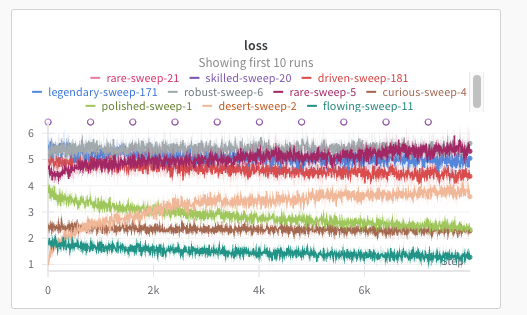

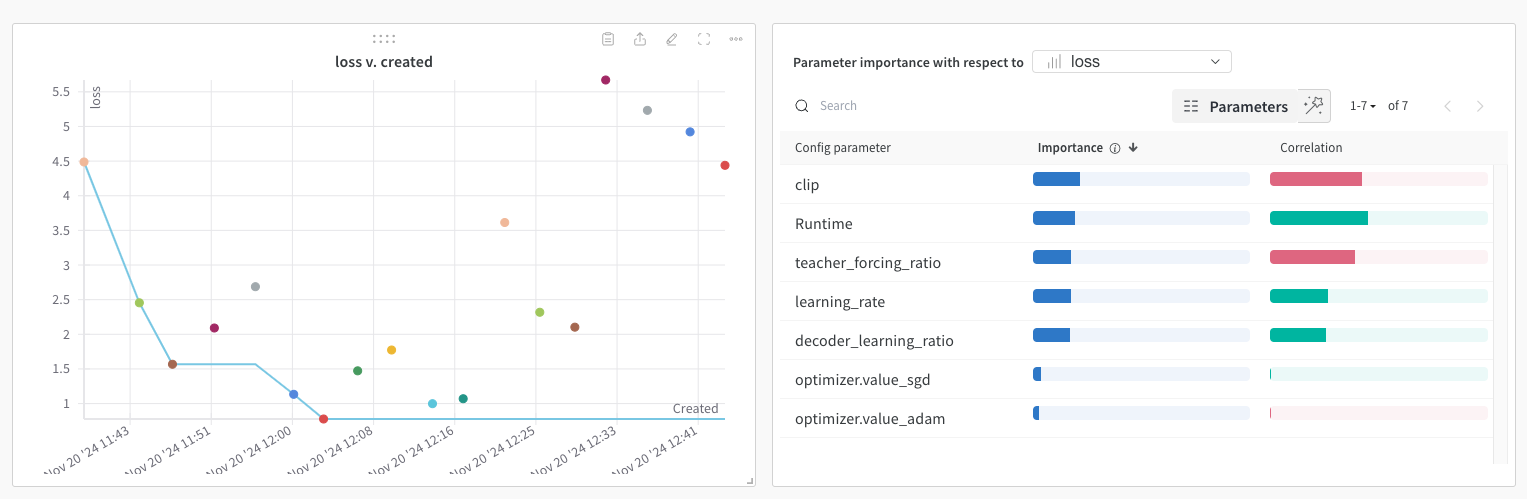

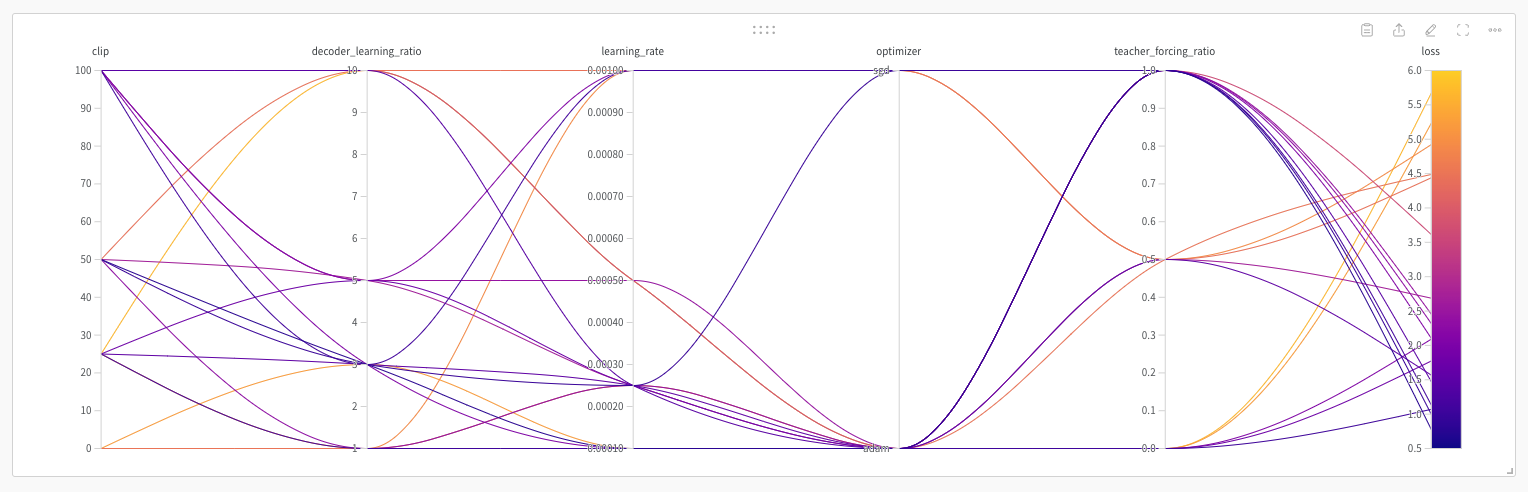

From these graph, I found the best hyperparameters (associated with the minimum loss) are:

- Clip: 50
- Decoder Learning Ratio: 3
- Learning Rate: 0.0001
- Optimizer: Adam
- Teacher Forcing Ratio: 1
- Loss: 0.7772


Clip and teacher_forcing_ratio have higher correlationship. Gradient clipping helps prevent exploding gradients during training, especially for models with large sequences or high learning rates. In the results, a moderate clipping value (like 50) shows optimal convergence. Too small or too large values can lead to slower convergence or unstable training. Teacher_forcing_ratio controls how often the model uses the true target during training. A higher teacher forcing ratio (e.g., 1.0) accelerates convergence but might lead to over-dependence on ground truth, causing issues during inference.


And then learning rate and decoder_learning_ration. Learning rate influences the speed and stability of convergence. In this experiment, smaller values (e.g., 0.0001) lead to better convergence, as they help the model make smaller, stable updates to weights. Larger learning rates might cause the model to overshoot minima, resulting in higher losses. The decoder learning rate multiplier adjusts how aggressively the decoder learns relative to the encoder. A value of 3 or 5 appears optimal in this case, enabling the decoder to focus on learning while keeping the encoder updates more conservative.

Choice of optimizer has the lowest correlationship which refers the choice of optimizer will not affect the model convergence a lot. We can choose either of them. Adam performs better in this experiment compared to SGD. This is likely due to Adam's ability to adapt learning rates dynamically, which helps during sparse gradient updates and accelerates convergence.

In [ ]:
best_config = {
    "clip": 50,
    "decoder_learning_ratio": 3,
    "learning_rate": 0.0001,
    "optimizer": "adam",
    "teacher_forcing_ratio": 1.0,
}


In [ ]:
best_model_path = "path_to_save_best_model.pth"
torch.save({
    'encoder_state_dict': encoder.state_dict(),
    'decoder_state_dict': decoder.state_dict(),
    'encoder_optimizer_state_dict': encoder_optimizer.state_dict(),
    'decoder_optimizer_state_dict': decoder_optimizer.state_dict(),
    'loss': 0.7772,
}, best_model_path)


# Problem 3

### Part1.
There are three vectors, called Query, Key, and Value. Q compute attention scores, K compares against Queries to calculate the attention weights, and V contains the information to be aggregated based on the attention weights.

### Part2.
First is dot production of Q and K which is  $Q_i*K_j$, for each query vector, multiply by all key vector.
Then we will scale it by the square root of the Key's dimension $d_k$ to avoid large values. And then we will apply the softmax function to normalized the score into probability. These scores represent the attention weights, determining the relevance of each key to the query, and are used to compute a weighted sum of the Value vectors for the final output.

### Part 3.
- $3*8+1 = 25$, thus we have 25 weight metrics
- $W_k, W_q,W_v$, $512*512/8 = 512*64$ with 24 weight metrics, and $W_o$, the output projection matrix, $512*512$


### Part 4.
First is concentration. If we have $h$ heads, outputs from all the heads are concatenated along the feature dimension, with vector size is $h*d_k$, where $d_k$ is output vector of size. For all words in sequence, the function will be $squence_length *h*d_k$.


Then the  matrix is multiplied by a learned projection weight matrix $W_o$ which size is $h*d_k*d_{model}$. This transformation maps the concatenated outputs back to the model’s original dimension .

Thus the final matrix deminsion will be $squence_length *d_{model}$. The resulting matrix is the input to the feed-forward layer.

# Problem 5

### Part 1. Grid search

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=3a400e6ed54cd382c2c91cf7e5795018edb38e403e18ea895a1969d537922af6
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [ ]:
import h2o
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpu28emqhw
  JVM stdout: /tmp/tmpu28emqhw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpu28emqhw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_bitn88
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
airlines= h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/airlines/allyears2k_headers.zip")


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# convert columns to factors
airlines["Year"]= airlines["Year"].asfactor()
airlines["Month"]= airlines["Month"].asfactor()
airlines["DayOfWeek"] = airlines["DayOfWeek"].asfactor()
airlines["Cancelled"] = airlines["Cancelled"].asfactor()
airlines['FlightNum'] = airlines['FlightNum'].asfactor()

# set the predictor names and the response column name
predictors = ["Origin", "Dest", "Year", "UniqueCarrier",
              "DayOfWeek", "Month", "Distance", "FlightNum"]
response = "IsDepDelayed"


In [ ]:
# split into train and validation sets
train, valid = airlines.split_frame(ratios = [.8], seed = 1234)


In [ ]:
hyper_params = {
    'ntrees': [10, 30, 50, 100],
    'max_depth': [1, 2, 4, 6]
}


In [ ]:
# train your model
rf_model = H2ORandomForestEstimator(seed = 1234)

In [ ]:
grid = H2OGridSearch(
    model=rf_model,
    hyper_params=hyper_params,
    grid_id='rf_grid'
)

In [ ]:
grid.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing logloss
    max_depth    ntrees    model_ids         logloss
--  -----------  --------  ----------------  ---------
    6            100       rf_grid_model_16  0.608204
    6            50        rf_grid_model_12  0.6086
    6            30        rf_grid_model_8   0.609082
    6            10        rf_grid_model_4   0.611029
    4            50        rf_grid_model_11  0.625007
    4            100       rf_grid_model_15  0.625435
    4            30        rf_grid_model_7   0.626248
    4            10        rf_grid_model_3   0.627018
    2            30        rf_grid_model_6   0.649162
    2            50        rf_grid_model_10  0.649553
    2            100       rf_grid_model_14  0.651209
    2            10        rf_grid_model_2   0.652244
    1            30        rf_grid_model_5   0.665601
    1            50        rf_grid_model_9   0.666378
    1            10        rf_grid_model_1   0.66735
    1            100       rf_grid_model_13  0.66775

In [ ]:
# display result of accuracy
sorted_grid = grid.get_grid(sort_by='accuracy', decreasing=True)
print(sorted_grid)

Hyper-Parameter Search Summary: ordered by decreasing accuracy
    max_depth    ntrees    model_ids         accuracy
--  -----------  --------  ----------------  ----------
    6            30        rf_grid_model_8   0.671479
    6            100       rf_grid_model_16  0.670563
    6            50        rf_grid_model_12  0.670104
    6            10        rf_grid_model_4   0.669761
    4            10        rf_grid_model_3   0.662542
    4            30        rf_grid_model_7   0.661969
    4            100       rf_grid_model_15  0.660594
    4            50        rf_grid_model_11  0.660021
    2            30        rf_grid_model_6   0.643978
    2            50        rf_grid_model_10  0.643864
    2            100       rf_grid_model_14  0.642374
    2            10        rf_grid_model_2   0.639853
    1            30        rf_grid_model_5   0.622665
    1            50        rf_grid_model_9   0.621749
    1            100       rf_grid_model_13  0.621519
    1            

In [ ]:
best_model = sorted_grid.models[0]
best_model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_grid_model_8


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 30                          40077                  6            6            6             47            64            59.6333

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.21072268453427775
RMSE: 0.45904540574356884
LogLoss: 0.6098666207068153
Mean Per-Class Error: 0.3671863817156913
AUC: 0.7309751151194064
AUCPR: 0.7432988400332903
Gini: 0.46195023023881276

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39760345148795045
       NO    YES    Error    Rate
-----  ----  -----  -------  -----------------
NO     6809  9957   0.5939   (9957.0/16766.0)
YES    2597  15888  0.1405   (2597.0/18485.0)
Total  9406  25845  0.3561   (12554.0/35251.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.397603     0.716806  290
max f2                       0.256907     0.847208  369
max f0point5                 0.540339     0.694309  202
max accuracy                 0.482553     0.676662  235
max precision                0.939172     1         0
max recall                   0.153344     1         397
max specificity              0.939172     1         0
max absolute_mcc             0.482553     0.350548  235
max min_per_class_accuracy   0.508288     0.674222  220
max mean_per_class_accuracy  0.50497      0.675074  222
max tns                      0.939172     16766     0
max fns                      0.939172     18479     0
max fps                      0.128229     16766     399
max tps                      0.153344     18485     397
max tnr                      0.939172     1         0
max fnr                      0.939172     0.999675  0
max fpr                      0.128229     1         399
max tpr                      0.153344     1         397

Gains/Lift Table: Avg response rate: 52.44 %, avg score: 52.51 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100139                   0.869521           1.78816   1.78816            0.937677         0.890105  0.937677                    0.890105            0.0179064       0.0179064                  78.8155   78.8155            0.0165942
2        0.0200278                   0.850127           1.6639    1.72603            0.872521         0.859033  0.905099                    0.874569            0.0166622       0.0345686                  66.3903   72.6029            0.0305724
3        0.0300133                   0.83488            1.66321   1.70513            0.872159         0.842363  0.89414                     0.863854            0.0166081       0.0511766                  66.3212   70.513             0.0444964
4        0.0400272                   0.820482           1.68011   1.69887            0.88102          0.827542  0.890858                    0.854769            0.0168245       0.0680011                  68.011    69.887             0.0588158
5        0.0500128                   0.808373           1.66863   1.69283            0.875            0.81444   0.887691                    0.846717     

In [ ]:
perf = best_model.model_performance(valid)
auc = perf.auc()

print(f"Best Model AUC: {auc}")

Best Model AUC: 0.7307260040736879


### Part 2. Randomized grid search

In [ ]:
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': 1234}

In [ ]:
grid2 = H2OGridSearch(
    model=rf_model,
    hyper_params=hyper_params,
    search_criteria=search_criteria,
    grid_id='rf_grid',

)



In [ ]:
grid2.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing logloss
    max_depth    ntrees    model_ids         logloss
--  -----------  --------  ----------------  ---------
    6            100       rf_grid_model_16  0.608204
    6            50        rf_grid_model_12  0.6086
    6            30        rf_grid_model_8   0.609082
    6            10        rf_grid_model_4   0.611029
    4            50        rf_grid_model_11  0.625007
    4            100       rf_grid_model_15  0.625435
    4            30        rf_grid_model_7   0.626248
    4            10        rf_grid_model_3   0.627018
    2            30        rf_grid_model_6   0.649162
    2            50        rf_grid_model_10  0.649553
    2            100       rf_grid_model_14  0.651209
    2            10        rf_grid_model_2   0.652244
    1            30        rf_grid_model_5   0.665601
    1            50        rf_grid_model_9   0.666378
    1            10        rf_grid_model_1   0.66735
    1            100       rf_grid_model_13  0.66775

In [ ]:
sorted_grid2 = grid2.get_grid(sort_by='accuracy', decreasing=True)
print(sorted_grid2)

Hyper-Parameter Search Summary: ordered by decreasing accuracy
    max_depth    ntrees    model_ids         accuracy
--  -----------  --------  ----------------  ----------
    6            30        rf_grid_model_8   0.671479
    6            100       rf_grid_model_16  0.670563
    6            50        rf_grid_model_12  0.670104
    6            10        rf_grid_model_4   0.669761
    4            10        rf_grid_model_3   0.662542
    4            30        rf_grid_model_7   0.661969
    4            100       rf_grid_model_15  0.660594
    4            50        rf_grid_model_11  0.660021
    2            30        rf_grid_model_6   0.643978
    2            50        rf_grid_model_10  0.643864
    2            100       rf_grid_model_14  0.642374
    2            10        rf_grid_model_2   0.639853
    1            30        rf_grid_model_5   0.622665
    1            50        rf_grid_model_9   0.621749
    1            100       rf_grid_model_13  0.621519
    1            

In [ ]:
best_model2 = sorted_grid2.models[0]
best_model2

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_grid_model_8


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 30                          40077                  6            6            6             47            64            59.6333

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.21072268453427775
RMSE: 0.45904540574356884
LogLoss: 0.6098666207068153
Mean Per-Class Error: 0.3671863817156913
AUC: 0.7309751151194064
AUCPR: 0.7432988400332903
Gini: 0.46195023023881276

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39760345148795045
       NO    YES    Error    Rate
-----  ----  -----  -------  -----------------
NO     6809  9957   0.5939   (9957.0/16766.0)
YES    2597  15888  0.1405   (2597.0/18485.0)
Total  9406  25845  0.3561   (12554.0/35251.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.397603     0.716806  290
max f2                       0.256907     0.847208  369
max f0point5                 0.540339     0.694309  202
max accuracy                 0.482553     0.676662  235
max precision                0.939172     1         0
max recall                   0.153344     1         397
max specificity              0.939172     1         0
max absolute_mcc             0.482553     0.350548  235
max min_per_class_accuracy   0.508288     0.674222  220
max mean_per_class_accuracy  0.50497      0.675074  222
max tns                      0.939172     16766     0
max fns                      0.939172     18479     0
max fps                      0.128229     16766     399
max tps                      0.153344     18485     397
max tnr                      0.939172     1         0
max fnr                      0.939172     0.999675  0
max fpr                      0.128229     1         399
max tpr                      0.153344     1         397

Gains/Lift Table: Avg response rate: 52.44 %, avg score: 52.51 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100139                   0.869521           1.78816   1.78816            0.937677         0.890105  0.937677                    0.890105            0.0179064       0.0179064                  78.8155   78.8155            0.0165942
2        0.0200278                   0.850127           1.6639    1.72603            0.872521         0.859033  0.905099                    0.874569            0.0166622       0.0345686                  66.3903   72.6029            0.0305724
3        0.0300133                   0.83488            1.66321   1.70513            0.872159         0.842363  0.89414                     0.863854            0.0166081       0.0511766                  66.3212   70.513             0.0444964
4        0.0400272                   0.820482           1.68011   1.69887            0.88102          0.827542  0.890858                    0.854769            0.0168245       0.0680011                  68.011    69.887             0.0588158
5        0.0500128                   0.808373           1.66863   1.69283            0.875            0.81444   0.887691                    0.846717     

In [ ]:
perf2 = best_model2.model_performance(valid)
auc2 = perf2.auc()

print(f"Best Model AUC: {auc2}")

Best Model AUC: 0.7307260040736879


### Part 3 H2O Auto ML

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
print(train.nrows)
print(valid.nrows)


35251
8727


In [ ]:
aml = H2OAutoML(max_models=20, seed=1234)
aml.train(x=predictors, y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20241120_234222


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       11/20
# GBM base models (used / total)           4/7
# XGBoost base models (used / total)       2/6
# DeepLearning base models (used / total)  3/4
# DRF base models (used / total)           2/2
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.17395594132203762
RMSE: 0.41708025765077594
LogLoss: 0.522484818888689
AUC: 0.8242594482828534
AUCPR: 0.8400847795731804
Gini: 0.6485188965657067
Null degrees of freedom: 10044
Residual degrees of freedom: 10033
Null deviance: 13905.026375436317
Residual deviance: 10496.720011473762
AIC: 10520.720011473762

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4053718830529706
       NO    YES    Error    Rate
-----  ----  -----  -------  ----------------
NO     2762  2034   0.4241   (2034.0/4796.0)
YES    705   4544   0.1343   (705.0/5249.0)
Total  3467  6578   0.2727   (2739.0/10045.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.405372     0.768411  262
max f2                       0.29156      0.862045  315
max f0point5                 0.582755     0.765553  179
max accuracy                 0.506501     0.74435   214
max precision                0.99284      1         0
max recall                   0.0664252    1         396
max specificity              0.99284      1         0
max absolute_mcc             0.506501     0.487632  214
max min_per_class_accuracy   0.515191     0.742077  210
max mean_per_class_accuracy  0.506501     0.743802  214
max tns                      0.99284      4796      0
max fns                      0.99284      5245      0
max fps                      0.0513955    4796      399
max tps                      0.0664252    5249      396
max tnr                      0.99284      1         0
max fnr                      0.99284      0.999238  0
max fpr                      0.0513955    1         399
max tpr                      0.0664252    1         396

Gains/Lift Table: Avg response rate: 52.25 %, avg score: 52.40 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100548                   0.947361           1.89475   1.89475            0.990099         0.967804  0.990099                    0.967804            0.0190512       0.0190512                  89.475    89.475             0.0188427
2        0.02001                     0.929712           1.9137    1.90418            1                0.93723   0.995025                    0.952593            0.0190512       0.0381025                  91.3698   90.4177            0.037894
3        0.0300647                   0.915706           1.89475   1.90102            0.990099         0.923091  0.993377                    0.942726            0.0190512       0.0571537                  89.475    90.1024            0.0567367
4        

In [ ]:
lb = aml.leaderboard
print(lb)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20241120_234222     0.755869   0.585975  0.768768                0.342832  0.447814  0.200538
StackedEnsemble_BestOfFamily_1_AutoML_1_20241120_234222  0.755647   0.586166  0.768856                0.345517  0.447923  0.200635
GBM_1_AutoML_1_20241120_234222                           0.75222    0.589745  0.763094                0.34722   0.449439  0.201996
GBM_grid_1_AutoML_1_20241120_234222_model_2              0.751107   0.590672  0.761103                0.34842   0.449843  0.202359
GBM_2_AutoML_1_20241120_234222                           0.749095   0.592417  0.758314                0.352562  0.450651  0.203086
DeepLearning_grid_1_AutoML_1_20241120_234222_model_1     0.747879   0.596292  0.761906                0.338988  0.451853  0.204171
GBM_4_AutoML_1_20241120_234222                           0.747815   0.595278  0.755

In [ ]:
m = aml.get_best_model()

In [ ]:
m


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20241120_234222


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       11/20
# GBM base models (used / total)           4/7
# XGBoost base models (used / total)       2/6
# DeepLearning base models (used / total)  3/4
# DRF base models (used / total)           2/2
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.17395594132203762
RMSE: 0.41708025765077594
LogLoss: 0.522484818888689
AUC: 0.8242594482828534
AUCPR: 0.8400847795731804
Gini: 0.6485188965657067
Null degrees of freedom: 10044
Residual degrees of freedom: 10033
Null deviance: 13905.026375436317
Residual deviance: 10496.720011473762
AIC: 10520.720011473762

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4053718830529706
       NO    YES    Error    Rate
-----  ----  -----  -------  ----------------
NO     2762  2034   0.4241   (2034.0/4796.0)
YES    705   4544   0.1343   (705.0/5249.0)
Total  3467  6578   0.2727   (2739.0/10045.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.405372     0.768411  262
max f2                       0.29156      0.862045  315
max f0point5                 0.582755     0.765553  179
max accuracy                 0.506501     0.74435   214
max precision                0.99284      1         0
max recall                   0.0664252    1         396
max specificity              0.99284      1         0
max absolute_mcc             0.506501     0.487632  214
max min_per_class_accuracy   0.515191     0.742077  210
max mean_per_class_accuracy  0.506501     0.743802  214
max tns                      0.99284      4796      0
max fns                      0.99284      5245      0
max fps                      0.0513955    4796      399
max tps                      0.0664252    5249      396
max tnr                      0.99284      1         0
max fnr                      0.99284      0.999238  0
max fpr                      0.0513955    1         399
max tpr                      0.0664252    1         396

Gains/Lift Table: Avg response rate: 52.25 %, avg score: 52.40 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100548                   0.947361           1.89475   1.89475            0.990099         0.967804  0.990099                    0.967804            0.0190512       0.0190512                  89.475    89.475             0.0188427
2        0.02001                     0.929712           1.9137    1.90418            1                0.93723   0.995025                    0.952593            0.0190512       0.0381025                  91.3698   90.4177            0.037894
3        0.0300647                   0.915706           1.89475   1.90102            0.990099         0.923091  0.993377                    0.942726            0.0190512       0.0571537                  89.475    90.1024            0.0567367
4        

In [ ]:
m.params.keys()

dict_keys(['model_id', 'training_frame', 'response_column', 'validation_frame', 'blending_frame', 'base_models', 'metalearner_algorithm', 'metalearner_nfolds', 'metalearner_fold_assignment', 'metalearner_fold_column', 'metalearner_params', 'metalearner_transform', 'max_runtime_secs', 'weights_column', 'offset_column', 'custom_metric_func', 'seed', 'score_training_samples', 'keep_levelone_frame', 'export_checkpoints_dir', 'auc_type', 'gainslift_bins'])

In [ ]:
for key in m.params.keys():
    print(f"{key}: {m.params[key]['actual']}")

model_id: {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'StackedEnsemble_AllModels_1_AutoML_1_20241120_234222', 'type': 'Key<Model>', 'URL': '/3/Models/StackedEnsemble_AllModels_1_AutoML_1_20241120_234222'}
training_frame: {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20241120_234222_training_py_7_sid_b198', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20241120_234222_training_py_7_sid_b198'}
response_column: {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'IsDepDelayed', 'is_member_of_frames': None}
validation_frame: None
blending_frame: None
base_models: [{'__meta': {'schema_version': 3, 'schema_name': 'KeyV3', 'schema_type': 'Key<Keyed>'}, 'name': 'GBM_1_AutoML_1_20241120_234222', 'type': 'Key<Keyed>', 'URL': None}, {'__meta': {'schema_version': 3, 'schema_name': 'KeyV3', 'schema_type': 'Key<Keyed>'

In [ ]:

test_performance = m.model_performance()

test_auc = test_performance.auc()
print(f"The AUC score of the best model on the test set is: {test_auc}")




The AUC score of the best model on the test set is: 0.8242594482828534


In [ ]:
xgb = aml.get_best_model(algorithm="xgboost", criterion="logloss")

In [ ]:
xgb

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20241120_234222


Model Summary: 
    number_of_trees
--  -----------------
    52

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.19197861411832373
RMSE: 0.4381536421374627
LogLoss: 0.5659170377377928
Mean Per-Class Error: 0.31923838224963635
AUC: 0.7800961078571659
AUCPR: 0.7932948012861756
Gini: 0.5601922157143318

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3974566581179795
       NO     YES    Error    Rate
-----  -----  -----  -------  -----------------
NO     8366   8400   0.501    (8400.0/16766.0)
YES    2541   15944  0.1375   (2541.0/18485.0)
Total  10907  24344  0.3104   (10941.0/35251.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.397457     0.744542  271
max f2                       0.234644     0.852377  349
max f0point5                 0.55881      0.729361  188
max accuracy                 0.505617     0.708831  213
max precision                0.984563     1         0
max recall                   0.0650634    1         397
max specificity              0.984563     1         0
max absolute_mcc             0.518822     0.417308  207
max min_per_class_accuracy   0.514003     0.707742  209
max mean_per_class_accuracy  0.518822     0.70889   207
max tns                      0.984563     16766     0
max fns                      0.984563     18475     0
max fps                      0.0511401    16766     399
max tps                      0.0650634    18485     397
max tnr                      0.984563     1         0
max fnr                      0.984563     0.999459  0
max fpr                      0.0511401    1         399
max tpr                      0.0650634    1         397

Gains/Lift Table: Avg response rate: 52.44 %, avg score: 52.56 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010099                    0.926954           1.88558   1.88558            0.988764         0.95138   0.988764                    0.95138             0.0190425       0.0190425                  88.5579   88.5579            0.0188039
2        0.0202264                   0.908637           1.80017   1.84281            0.943978         0.916889  0.966339                    0.93411             0.018231        0.0372735                  80.0171   84.2815            0.035842
3        0.0301552                   0.89585            1.80893   1.83166            0.948571         0.902149  0.960489                    0.923587            0.0179605       0.055234                   80.8931   83.1658            0.0527289
4        0.040084                    0.880808           1.75989   1.81388            0.922857         0.888015  0.951168                    0.914776            0.0174736       0.0727076                  75.9894   81.3882            0.0685921
5        0.0500411                   0.869121           1.73315   1.79782            0.908832         0.874708  0.942744                    0.906803            0.0172572       0.0899648                  73.3148   79.7818            0.0839407
6        0.100082                    0.81268            1.66917   1.73349            0.875283         0.841351  0.909014                    0.874077            0.0835272       0.173492                   66.9171   73.3494            0.154346
7        0.150067                    0.766024           1.57691   1.68134      